<a href="https://colab.research.google.com/github/jon-chun/2018-fall-kenyon-iphs391/blob/master/sentimentarcs_cruxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SentimentArcs Part 7: Join Norm**

Jon Chun
15 Sep 2021

* https://colab.research.google.com/github/chengjun/mybook/blob/main/11-4-sentiment-classifier.ipynb#scrollTo=c749tKCSZpbw

# **Sandbox Testing**

In [ ]:
!pip install alpha_vantage

In [ ]:
# https://algotrading101.com/learn/python-correlation-guide/

import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [ ]:
#grab tickers from csv file

# watchlist_df = pd.read_csv('watchlist.csv', header=None)
# watchlist = watchlist_df.iloc[0].tolist()

watchlist = ['AAPL', 'MSFT', 'GLD', 'XOM', 'NFLX']

In [ ]:
%env ALPHAVANTAGE_API_KEY='8BK5HZ2RTSMFHG9U'

In [ ]:
#instantiate TimeSeries class from alpha_vantage library
app = TimeSeries(output_format='pandas')

In [ ]:
#itter through watchlist and retrieve daily price data
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    # print(f'alphav header:\n    {type(alphav_df)}')
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]

    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [ ]:
stocks_df.shape

In [ ]:
stocks_df.iloc[0]['AAPL'] # .isna().all()

In [ ]:
stocks_df[stocks_df.isna().any(axis=1)]

In [ ]:
stocks_df.head()

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.MSFT))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='kendall'))

In [ ]:
stocks_df.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(stocks_df.corr())
plt.show()

In [ ]:
ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)
plt.show()

In [ ]:
nflx_corr_df = stocks_df.corr().NFLX
print(nflx_corr_df.idxmax())

In [ ]:
nflx_corr_df[ nflx_corr_df < 1 ]

In [ ]:
  print(nflx_corr_df[ nflx_corr_df < 1 ].idxmax())

In [ ]:
print(nflx_corr_df.idxmin())

In [ ]:
stocks_df.cov()

In [ ]:
import numpy as np

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(np.square(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman')))

# **Install and Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [2]:
import os
import sys
import io
import glob
import pickle

import re
import string
import copy

In [ ]:
!pip install texthero

In [ ]:
import texthero as hero
from texthero import preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

# **Configure Jupyter**

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [5]:
from IPython.display import Image

In [6]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


In [7]:
# Enlarge matplotlib plot size

plt.rcParams["figure.figsize"] = (20, 40)

# temporarily
# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=80)

# **Connect to gDrive**

In [8]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [9]:
%cd ./research/2021/sa_book_code/books_sa/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa


# **Globals**

In [10]:
# List of Corpora

corpora_ls = ['cdickens_achristmascarol',
              'cdickens_greatexpectations',
              'ddefoe_robinsoncrusoe',
              'emforster_howardsend',
              'fbaum_thewonderfulwizardofoz',
              'fdouglass_narrativelifeofaslave',
              'fscottfitzgerald_thegreatgatsby',
              'geliot_middlemarch',
              'hjames_portraitofalady',
              'homer-ewilson_odyssey',
              'imcewan_machineslikeme',
              'jausten_prideandprejudice', # missing RoBERTaXML8lang
              'jconrad_heartofdarkness',
              'jjoyce_portraitoftheartist',
              'jkrowling_1sorcerersstone',  
              'mproust-mtreharne_3guermantesway', # missing all Transformers
              'mshelley_frankenstein',
              'mtwain_huckleberryfinn',
              'staugustine_confessions9end',
              'tmorrison_beloved',
              'vnabokov_palefire',
              'vwoolf_mrsdalloway',
              'vwoolf_orlando',
              'vwoolf_thewaves',
              'vwoolf_tothelighthouse']

In [11]:
# Taxonomy of Models 

groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

models_ml_ls = ['multinb',
             'logreg',
             'logreg_cv',
             'rf',
             'xgb',
             'flaml',
             'autogluon']
             
models_dnn_ls = ['fcn',
              'lstm',
              'cnn']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

In [12]:
corpora_full_dt = {
    'cdickens_achristmascarol':'A Christmas Carol by Charles Dickens',
    'cdickens_greatexpectations':'Great Expectations by Charles Dickens',
    'ddefoe_robinsoncrusoe':'Robinson Crusoe by Daniel Defoe',
    'emforster_howardsend':'Howards End by E.M.Forster',
    'fbaum_thewonderfulwizardofoz':'The Wonderful Wizard of Oz by Frank Baum',
    'fdouglass_narrativelifeofaslave':'Narrative of the Life of Frederick Douglass, An American Slave',
    'fscottfitzgerald_thegreatgatsby':'The Great Gatsby by F.Scott Fitzgerald',
    'geliot_middlemarch':'Middlemarch by George Eliot',
    'hjames_portraitofalady':'Portrait of a Lady by Henry James',
    'homer-ewilson_odyssey':'The Odyssey by Homer (trans. Emily Wilson)',
    'imcewan_machineslikeme':'Machines Like Me by Ian McEwan',
    'jausten_prideandprejudice':'Pride and Prejudice by Jane Austen',
    'jconrad_heartofdarkness':'Heart of Darkness by Joseph Conrad',
    'jjoyce_portraitoftheartist':'A Portrait of the Artist as a Young Man by James Joyce',
    'jkrowling_1sorcerersstone':'Harry Potter and the Sorcerers Stone by J.K.Rowling',
    'mproust-mtreharne_3guermantesway':'The Guermantes Way by Marcel Proust',
    'mshelley_frankenstein':'Frankenstein by Mary Shelley',
    'mtwain_huckleberryfinn':'Huckleberry Finn by Mark Twain',
    'staugustine_confessions9end':'Confessions (thru Book 9) by St. Augustine',
    'tmorrison_beloved':'Beloved by Toni Morrison',
    'vnabokov_palefire':'Palefire by Vladimir Nabokov',
    'vwoolf_mrsdalloway':'Mrs. Dalloway by Virginia Woolf',
    'vwoolf_orlando':'Orlando by Virginia Woolf',
    'vwoolf_thewaves':'The Waves by Virginia Woolf',
    'vwoolf_tothelighthouse':'To The Lighthouse by Virginia Woolf'}

In [13]:
# Master Dictionary of DataFrames (one per Corpus), each column with raw sentiment polarities from a given model 
#   declare early to minimize accidental clobbering/deletion

corpora_all_dt = {}

# **Custom Functions**

In [188]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def get_metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

# **Read Every Model Sentiment Data**

* https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [ ]:
# Get list of files in data subdir

data_dir = './data_corpora_sa'

filenames_ls = os.listdir(data_dir)
filenames_ls


['models_dnn_cdickens_achristmascarol.csv',
 'models_dnn_fscottfitzgerald_thegreatgatsby.csv',
 'models_dnn_ddefoe_robinsoncrusoe.csv',
 'models_dnn_fdouglass_narrativelifeofaslave.csv',
 'models_dnn_imcewan_machineslikeme.csv',
 'models_dnn_cdickens_greatexpectations.csv',
 'models_dnn_emforster_howardsend.csv',
 'models_dnn_homer-ewilson_odyssey.csv',
 'models_dnn_fbaum_thewonderfulwizardofoz.csv',
 'models_dnn_geliot_middlemarch.csv',
 'models_dnn_hjames_portraitofalady.csv',
 'models_dnn_jausten_prideandprejudice.csv',
 'models_dnn_jkrowling_1sorcerersstone.csv',
 'models_dnn_jjoyce_portraitoftheartist.csv',
 'models_dnn_jconrad_heartofdarkness.csv',
 'models_dnn_staugustine_confessions9end.csv',
 'models_dnn_mshelley_frankenstein.csv',
 'models_dnn_mtwain_huckleberryfinn.csv',
 'models_dnn_mproust-mtreharne_3guermantesway.csv',
 'models_dnn_vnabokov_palefire.csv',
 'models_dnn_tmorrison_beloved.csv',
 'models_dnn_vwoolf_mrsdalloway.csv',
 'models_dnn_vwoolf_tothelighthouse.csv',
 

## **Read Individual Models [corpora_sa_df]**

In [ ]:
%%time

# NOTE: 1m10s

# Read in all models sentiment values in *.csv files located in data_dir
#   into Global Dict (corpora_sa_dt) 
#   with keys=corpora and values=models sentiment values

corpora_sa_dt = {}
model_group_set = set()

def read_csvfiles(folder_path):

  for i,afile in enumerate(filenames_ls):
    print(f'Reading in afile #{i}: {afile}')
    full_path = f'{folder_path}/{afile}'
    print(f'  full_path: {full_path}')
    model_name = '_'.join(afile.split('_')[1:])
    model_name = model_name.split('.')[0]
    print(f'  model_name: {model_name}')
    corpora_sa_dt[model_name] = pd.read_csv(full_path) # .to_dict()
    model_group = model_name.split('_')[0]
    print(f'  model_group: {model_group}')
    model_group_set.add(model_group)

read_csvfiles(data_dir)

Reading in afile #0: models_dnn_cdickens_achristmascarol.csv
  full_path: ./data_corpora_sa/models_dnn_cdickens_achristmascarol.csv
  model_name: dnn_cdickens_achristmascarol
  model_group: dnn
Reading in afile #1: models_dnn_fscottfitzgerald_thegreatgatsby.csv
  full_path: ./data_corpora_sa/models_dnn_fscottfitzgerald_thegreatgatsby.csv
  model_name: dnn_fscottfitzgerald_thegreatgatsby
  model_group: dnn
Reading in afile #2: models_dnn_ddefoe_robinsoncrusoe.csv
  full_path: ./data_corpora_sa/models_dnn_ddefoe_robinsoncrusoe.csv
  model_name: dnn_ddefoe_robinsoncrusoe
  model_group: dnn
Reading in afile #3: models_dnn_fdouglass_narrativelifeofaslave.csv
  full_path: ./data_corpora_sa/models_dnn_fdouglass_narrativelifeofaslave.csv
  model_name: dnn_fdouglass_narrativelifeofaslave
  model_group: dnn
Reading in afile #4: models_dnn_imcewan_machineslikeme.csv
  full_path: ./data_corpora_sa/models_dnn_imcewan_machineslikeme.csv
  model_name: dnn_imcewan_machineslikeme
  model_group: dnn
Rea

In [ ]:
# Show model groups based upon datafile prefix (e.g. 'baseline_' or 'dnn_')

print(f'model_group_set:\n  {model_group_set}')

model_group_set:
  {'ml', 'baseline', 'dnn', 'all'}


In [ ]:
# Verify the number and names of Corpora read

[i for i in corpora_sa_dt.keys()]

print(f'\n\n    Read {len(corpora_sa_dt.keys())} Corpora')

['dnn_cdickens_achristmascarol',
 'dnn_fscottfitzgerald_thegreatgatsby',
 'dnn_ddefoe_robinsoncrusoe',
 'dnn_fdouglass_narrativelifeofaslave',
 'dnn_imcewan_machineslikeme',
 'dnn_cdickens_greatexpectations',
 'dnn_emforster_howardsend',
 'dnn_homer-ewilson_odyssey',
 'dnn_fbaum_thewonderfulwizardofoz',
 'dnn_geliot_middlemarch',
 'dnn_hjames_portraitofalady',
 'dnn_jausten_prideandprejudice',
 'dnn_jkrowling_1sorcerersstone',
 'dnn_jjoyce_portraitoftheartist',
 'dnn_jconrad_heartofdarkness',
 'dnn_staugustine_confessions9end',
 'dnn_mshelley_frankenstein',
 'dnn_mtwain_huckleberryfinn',
 'dnn_mproust-mtreharne_3guermantesway',
 'dnn_vnabokov_palefire',
 'dnn_tmorrison_beloved',
 'dnn_vwoolf_mrsdalloway',
 'dnn_vwoolf_tothelighthouse',
 'dnn_vwoolf_orlando',
 'dnn_vwoolf_thewaves',
 'ml_cdickens_achristmascarol',
 'ml_ddefoe_robinsoncrusoe',
 'ml_emforster_howardsend',
 'ml_fdouglass_narrativelifeofaslave',
 'ml_fbaum_thewonderfulwizardofoz',
 'ml_fscottfitzgerald_thegreatgatsby',
 'ml



    Read 100 Corpora


In [ ]:
corpora_sa_dt['ml_vwoolf_thewaves'].columns

Index(['Unnamed: 0', 'sent_no', 'sent_clean', 'multinb', 'multinb_stdscaler',
       'logreg', 'logreg_stdscaler', 'logreg_cv', 'logreg_cv_stdscaler', 'rf',
       'rf_stdscaler', 'xgb', 'xgb_stdscaler', 'flaml', 'flaml_stdscaler',
       'autogluon', 'autogluon_stdscaler'],
      dtype='object')

In [ ]:
corpora_sa_dt['baseline_cdickens_achristmascarol'].head(1)
corpora_sa_dt['baseline_cdickens_achristmascarol'].info()

Unnamed: 0  sent_no  parag_no  ...  imdb2way t5imdb50k robertaxml8lang
0           0        0         0  ...  0.992263         1        1.591256

[1 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1399 non-null   int64  
 1   sent_no          1399 non-null   int64  
 2   parag_no         1399 non-null   int64  
 3   sect_no          1399 non-null   int64  
 4   sent_raw         1399 non-null   object 
 5   sent_clean       1399 non-null   object 
 6   char_len         1399 non-null   int64  
 7   token_len        1399 non-null   int64  
 8   sentimentr       1399 non-null   float64
 9   syuzhet          1399 non-null   float64
 10  bing             1399 non-null   float64
 11  sentiword        1399 non-null   float64
 12  senticnet        1399 non-null   float64
 13  nrc              1399 non-null   float64
 14  afinn            1399 non-null   float64
 15  scores           1399 non-null   object 
 16  vader            1399 non-null   float64
 17  textblob      

## **Merge all Models together for each Corpus [corpora_all_df]**

In [ ]:
# Get common corpus roots 

corpus_root_set = set()

# print(f'\nStarting with {len(filenames_ls)} total corpus x model combinations\n')
for acorpus_model in filenames_ls:
  corpus_model_root = '_'.join(acorpus_model.split('_')[2:])
  corpus_model_root = corpus_model_root.split('.')[0]
  print(f'corpus_model_root: {corpus_model_root}')
  corpus_root_set.add(corpus_model_root)

corpus_root_ls = list(corpus_root_set)
print(f'\nThese {len(filenames_ls)} original (corpus)x(model) combination files\n  were reduced to {len(corpus_root_ls)} unique corpus roots')

corpus_model_root: cdickens_achristmascarol
corpus_model_root: fscottfitzgerald_thegreatgatsby
corpus_model_root: ddefoe_robinsoncrusoe
corpus_model_root: fdouglass_narrativelifeofaslave
corpus_model_root: imcewan_machineslikeme
corpus_model_root: cdickens_greatexpectations
corpus_model_root: emforster_howardsend
corpus_model_root: homer-ewilson_odyssey
corpus_model_root: fbaum_thewonderfulwizardofoz
corpus_model_root: geliot_middlemarch
corpus_model_root: hjames_portraitofalady
corpus_model_root: jausten_prideandprejudice
corpus_model_root: jkrowling_1sorcerersstone
corpus_model_root: jjoyce_portraitoftheartist
corpus_model_root: jconrad_heartofdarkness
corpus_model_root: staugustine_confessions9end
corpus_model_root: mshelley_frankenstein
corpus_model_root: mtwain_huckleberryfinn
corpus_model_root: mproust-mtreharne_3guermantesway
corpus_model_root: vnabokov_palefire
corpus_model_root: tmorrison_beloved
corpus_model_root: vwoolf_mrsdalloway
corpus_model_root: vwoolf_tothelighthouse
c

In [ ]:
corpora_sa_dt.keys()

dict_keys(['dnn_cdickens_achristmascarol', 'dnn_fscottfitzgerald_thegreatgatsby', 'dnn_ddefoe_robinsoncrusoe', 'dnn_fdouglass_narrativelifeofaslave', 'dnn_imcewan_machineslikeme', 'dnn_cdickens_greatexpectations', 'dnn_emforster_howardsend', 'dnn_homer-ewilson_odyssey', 'dnn_fbaum_thewonderfulwizardofoz', 'dnn_geliot_middlemarch', 'dnn_hjames_portraitofalady', 'dnn_jausten_prideandprejudice', 'dnn_jkrowling_1sorcerersstone', 'dnn_jjoyce_portraitoftheartist', 'dnn_jconrad_heartofdarkness', 'dnn_staugustine_confessions9end', 'dnn_mshelley_frankenstein', 'dnn_mtwain_huckleberryfinn', 'dnn_mproust-mtreharne_3guermantesway', 'dnn_vnabokov_palefire', 'dnn_tmorrison_beloved', 'dnn_vwoolf_mrsdalloway', 'dnn_vwoolf_tothelighthouse', 'dnn_vwoolf_orlando', 'dnn_vwoolf_thewaves', 'ml_cdickens_achristmascarol', 'ml_ddefoe_robinsoncrusoe', 'ml_emforster_howardsend', 'ml_fdouglass_narrativelifeofaslave', 'ml_fbaum_thewonderfulwizardofoz', 'ml_fscottfitzgerald_thegreatgatsby', 'ml_cdickens_greatexpect

In [ ]:
# Verify sample Model features

corpora_sa_dt['ml_fdouglass_narrativelifeofaslave'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1688 non-null   int64  
 1   sent_no              1688 non-null   int64  
 2   sent_clean           1688 non-null   object 
 3   multinb              1688 non-null   int64  
 4   multinb_stdscaler    1688 non-null   float64
 5   logreg               1688 non-null   int64  
 6   logreg_stdscaler     1688 non-null   float64
 7   logreg_cv            1688 non-null   int64  
 8   logreg_cv_stdscaler  1688 non-null   float64
 9   rf                   1688 non-null   int64  
 10  rf_stdscaler         1688 non-null   float64
 11  xgb                  1688 non-null   int64  
 12  xgb_stdscaler        1688 non-null   float64
 13  flaml                1688 non-null   int64  
 14  flaml_stdscaler      1688 non-null   float64
 15  autogluon            1688 non-null   i

In [ ]:
corpora_all_dt = {}

models_dnn_ls

['fcn', 'lstm', 'cnn']

In [ ]:
# Create corpus_all_df that merges all Models for a given Corpus

model_dfs_ls = []

for i,acorpus in enumerate(corpus_root_ls):
  model_dfs_ls = []

  # Get all the 'corpus_model' keys for each 'corpus'
  for j, agroup in enumerate(model_group_set):
    corpus_model = f'{agroup}_{acorpus}'
    print(f'\n\n{agroup.upper()} Models #{i*len(model_group_set) + j}: {corpus_model}.csv')
    model_cols_ls = corpora_sa_dt[corpus_model].columns
    print(f'  Cols: {model_cols_ls}')
    corpus_model_path = f'{data_dir}/models_{corpus_model}.csv'
    # adf = pd.DataFrame()
    adf = pd.read_csv(corpus_model_path, index_col=None)
    model_dfs_ls.append(adf)
  
  # Merge the 3 DataFrames (baseline_, ml_, dnn_)
  corpus_all_df = model_dfs_ls[0].merge(model_dfs_ls[1], on='sent_no').merge(model_dfs_ls[2], on='sent_no') # pd.concat(model_dfs_ls, axis=0, ignore_index=True)
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('Unnamed')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('stdscaler')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('scores')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_len')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_x')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_y')]
  print('\n')
  corpora_all_dt[acorpus] = corpus_all_df



ML Models #0: ml_staugustine_confessions9end.csv
  Cols: Index(['Unnamed: 0', 'sent_no', 'sent_clean', 'multinb', 'multinb_stdscaler',
       'logreg', 'logreg_stdscaler', 'logreg_cv', 'logreg_cv_stdscaler', 'rf',
       'rf_stdscaler', 'xgb', 'xgb_stdscaler', 'flaml', 'flaml_stdscaler',
       'autogluon', 'autogluon_stdscaler'],
      dtype='object')


BASELINE Models #1: baseline_staugustine_confessions9end.csv
  Cols: Index(['Unnamed: 0', 'sent_no', 'parag_no', 'sect_no', 'sent_raw',
       'sent_clean', 'char_len', 'token_len', 'sentimentr', 'syuzhet', 'bing',
       'sentiword', 'senticnet', 'nrc', 'afinn', 'scores', 'vader', 'textblob',
       'pattern', 'stanza', 'flair', 'jockers_rinker', 'jockers', 'huliu',
       'lmcd', 'roberta15lg', 'yelp', 'nlptown', 'huggingface', 'hinglish',
       'imdb2way', 't5imdb50k', 'robertaxml8lang'],
      dtype='object')


DNN Models #2: dnn_staugustine_confessions9end.csv
  Cols: Index(['Unnamed: 0', 'sent_no', 'sent_clean', 'fcn', 'fcn_st

In [ ]:
# Check copora and model counts

col_nonmodel_ct = 5 # non model columns (e.g. sent_no, parag_no, sect_no, sent_raw, sent_clean)

print('SUMMARY ----------')
print(f'{len(corpora_all_dt)} Corpora in dataset')
print(f"{len(corpora_all_dt['hjames_portraitofalady'].columns) - col_nonmodel_ct} Models for each Corpus")

SUMMARY ----------
25 Corpora in dataset
34 Models for each Corpus


In [ ]:
corpora_sa_dt['ml_hjames_portraitofalady'].head(1)

Unnamed: 0  sent_no  ... autogluon  autogluon_stdscaler
0           0        0  ...         1             0.750506

[1 rows x 17 columns]

In [ ]:
corpora_all_dt['hjames_portraitofalady'].head(2)
# corpora_all_dt['hjames_portraitofalady'].info()

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].info()

In [ ]:
# corpora_all_dt['tmorrison_beloved']['pattern'].rolling(400, center=True).mean().plot()

In [ ]:
!pwd

In [ ]:
# temp_df = pd.read_csv('./tmorrison_beloved/beloved_pattern.csv')

In [ ]:
# temp_df['pattern'].value_counts()

# **Standardize and Smooth**

## **Get Data**

### **Option (a): Read in zScore/SMA 10% DataFrames**

In [14]:
# ERROR: must get median_z

# Read all models with orignal and zscore values

subdir_all = 'data_corpora_all'

corpora_all_dt = {}

cols_drop_ls = ['fcn', 'lstm', 'cnn', 'multinb', 'logreg', 'logreg_cv', 'rf', 'xgb', 'flaml', 'autogluon',
                'sentimentr', 'syuzhet', 'bing', 'sentiword', 'senticnet', 'nrc',
                'afinn', 'vader', 'textblob', 'pattern', 'stanza', 'flair',
                'jockers_rinker', 'jockers', 'huliu', 'lmcd', 'roberta15lg', 'yelp',
                'nlptown', 'huggingface', 'hinglish', 'imdb2way', 't5imdb50k',
                'robertaxml8lang']

for i, acorpus in enumerate(corpora_ls):

  filepath = f'./{subdir_all}/models_all_{acorpus}.csv'

  print(f'Reading {acorpus} from:\n    {filepath}\n')

  corpora_all_dt[acorpus] = pd.read_csv(filepath, index_col=[0])
  corpora_all_dt[acorpus].drop(columns=cols_drop_ls, axis=1, inplace=True)
  # corpus_all_df = corpus_all_df.loc[:, corpus_all_df.columns.str.contains('_z')]
  


Reading cdickens_achristmascarol from:
    ./data_corpora_all/models_all_cdickens_achristmascarol.csv

Reading cdickens_greatexpectations from:
    ./data_corpora_all/models_all_cdickens_greatexpectations.csv

Reading ddefoe_robinsoncrusoe from:
    ./data_corpora_all/models_all_ddefoe_robinsoncrusoe.csv

Reading emforster_howardsend from:
    ./data_corpora_all/models_all_emforster_howardsend.csv

Reading fbaum_thewonderfulwizardofoz from:
    ./data_corpora_all/models_all_fbaum_thewonderfulwizardofoz.csv

Reading fdouglass_narrativelifeofaslave from:
    ./data_corpora_all/models_all_fdouglass_narrativelifeofaslave.csv

Reading fscottfitzgerald_thegreatgatsby from:
    ./data_corpora_all/models_all_fscottfitzgerald_thegreatgatsby.csv

Reading geliot_middlemarch from:
    ./data_corpora_all/models_all_geliot_middlemarch.csv

Reading hjames_portraitofalady from:
    ./data_corpora_all/models_all_hjames_portraitofalady.csv

Reading homer-ewilson_odyssey from:
    ./data_corpora_all/mode

In [15]:
# Verify a Model columns for both regular and z-Score values

corpora_all_dt['cdickens_achristmascarol'].shape

print('\n')

corpora_all_dt['cdickens_achristmascarol'].columns

(1399, 40)

Index(['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'flair_z',
       'jockers_rinker_z', 'sentimentr_z', 'nlptown_z', 'hinglish_z',
       'multinb_z', 'pattern_z', 'autogluon_z', 'yelp_z', 'huggingface_z',
       'robertaxml8lang_z', 'rf_z', 'flaml_z', 'fcn_z', 'cnn_z', 'huliu_z',
       'vader_z', 'logreg_z', 'senticnet_z', 'jockers_z', 'logreg_cv_z',
       'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z', 'textblob_z', 'roberta15lg_z',
       'sentiword_z', 'afinn_z', 't5imdb50k_z', 'stanza_z', 'imdb2way_z',
       'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

In [16]:
corpora_all_dt['cdickens_achristmascarol'].head(2)

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

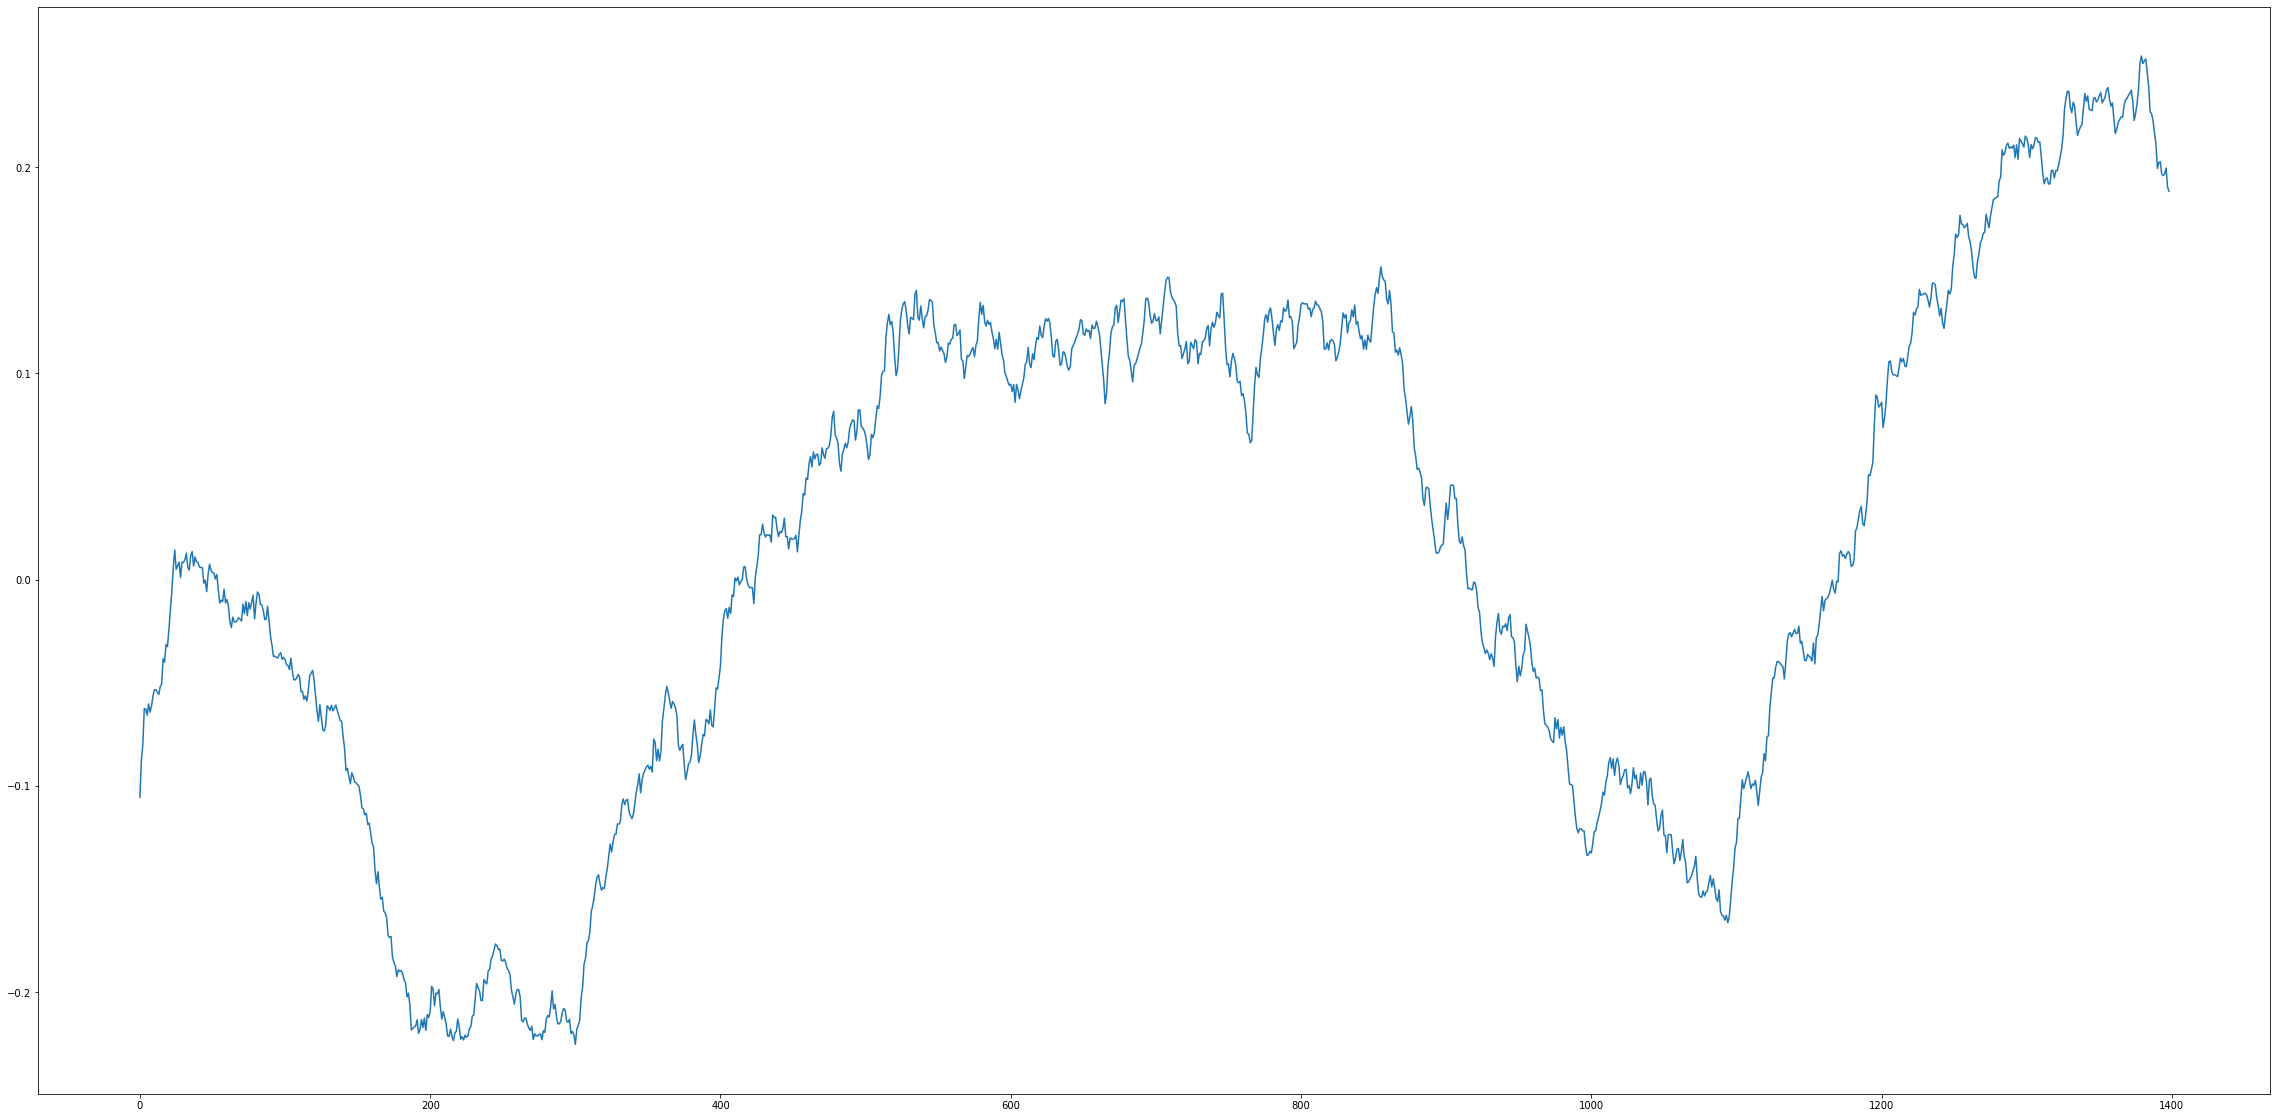

In [17]:
plt.rcParams["figure.figsize"] = (40,20)

win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0])
               
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot();

### **Execute for both Option (a) and Option (b)**

In [18]:
models_ls = corpora_all_dt.keys()
print(models_ls)
print(f'\nThere are {len(models_ls)} Corpora')

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'emforster_howardsend', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jausten_prideandprejudice', 'jconrad_heartofdarkness', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'staugustine_confessions9end', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_orlando', 'vwoolf_thewaves', 'vwoolf_tothelighthouse'])

There are 25 Corpora


In [19]:
model_all_cols_ls = corpora_all_dt['cdickens_achristmascarol'].columns
print(model_all_cols_ls)

print(f'\nEach Corpus has {len(model_all_cols_ls)} Columns')

model_noncols_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']
print(f'\n  {len(model_noncols_ls)} Columns are meta-information (not Models)\n  {model_noncols_ls}')


model_cols_ls = list(set(model_all_cols_ls) - set(model_noncols_ls))
print(f'\n  {len(model_cols_ls)} Columns are these Models:\n  {[i for i in model_cols_ls]}')

# Get list of zScore Model Columns in Corpus DataFrame
model_z_cols_ls = [i for i in model_cols_ls if i.endswith('_z')]
print(f'\n  {len(model_z_cols_ls)} zScore Columns are these Models:\n  {[i for i in model_z_cols_ls]}')


Index(['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'flair_z',
       'jockers_rinker_z', 'sentimentr_z', 'nlptown_z', 'hinglish_z',
       'multinb_z', 'pattern_z', 'autogluon_z', 'yelp_z', 'huggingface_z',
       'robertaxml8lang_z', 'rf_z', 'flaml_z', 'fcn_z', 'cnn_z', 'huliu_z',
       'vader_z', 'logreg_z', 'senticnet_z', 'jockers_z', 'logreg_cv_z',
       'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z', 'textblob_z', 'roberta15lg_z',
       'sentiword_z', 'afinn_z', 't5imdb50k_z', 'stanza_z', 'imdb2way_z',
       'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

Each Corpus has 40 Columns

  5 Columns are meta-information (not Models)
  ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']

  35 Columns are these Models:
  ['flair_z', 'nlptown_z', 'lstm_z', 'hinglish_z', 'pattern_z', 'fcn_z', 'yelp_z', 'rf_z', 'robertaxml8lang_z', 'vader_z', 'huliu_z', 'sentiword_z', 'multinb_z', 'imdb2way_z', 'cnn_z', 'bing_z', 'jockers_rinker_z', 'jockers_z', 'roberta15lg_z'

### **Option (b): Generate zScore/SMA 10% DataFrames**

In [ ]:
# Specific types for Corpus columns

print('Before specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    corpora_all_dt[acorpus][amodel] = corpora_all_dt[acorpus][amodel].astype('float')
  corpora_all_dt[acorpus]['sent_raw'] = corpora_all_dt[acorpus]['sent_raw'].astype('string')
  corpora_all_dt[acorpus]['sent_clean'] = corpora_all_dt[acorpus]['sent_clean'].astype('string')


print('After specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()
# corpora_all_dt[acorpus][amodel].astype(np.float64)

In [ ]:
# Setup

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# fit and transform the data
# scaled_data = scaler.fit_transform(X)

In [ ]:
type(stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']).reshape(1,-1)))

In [ ]:
# corpora_all_dt['cdickens_achristmascarol']['xgb_stdscaler'] = stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']))

In [ ]:
# Setup

from scipy.stats import zscore

In [ ]:
# Test scipy zscore with plot

plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['vader'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Compute z-scores for all Model Time Series and add to corpora_all_dt[acorpus] DataFrame

# corpora_allz_dt = {}
temp_df = pd.DataFrame()

pattern_z = re.compile(r'_z$')

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # Skip existing z-Scores
    if not pattern_z.search(amodel): 
      print(f'  processing model: {amodel}')
      temp_np = np.asarray(corpora_all_dt[acorpus][amodel])
      temp_z_np = zscore(temp_np)

      amodel_z = f'{amodel}_z'
      corpora_all_dt[acorpus][amodel_z] = pd.Series(temp_z_np)

In [ ]:
# Verify zScores for all Models are computed

corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].columns

In [ ]:
# Compute the median_z for all individual zScore Models in each Corpus

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')

  if 'median_z' in corpora_all_dt[acorpus].columns:
    print(f'  Skip, median_z already exists')
  else:
    print(f'  Added median_z')
    corpora_all_dt[acorpus]['median_z'] = corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].median(axis=1)

In [ ]:
corpora_all_dt['cdickens_achristmascarol']['median_z']

In [ ]:
# Test median calculation with plot

win10per = int(0.1*temp_df.shape[0])
corpora_all_dt['cdickens_achristmascarol']['median_z'].plot()
win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0]) 
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Test scipy zscore with plot
"""
plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['median_z'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True).mean().plot()
""";

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns

## **Plot zScore/SMA 10%**

In [ ]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

In [ ]:
model_cols_ls

['syuzhet_z',
 'lstm_z',
 'nrc_z',
 'textblob_z',
 'roberta15lg_z',
 'jockers_z',
 'sentimentr_z',
 'median_z',
 'flaml_z',
 'huliu_z',
 'senticnet_z',
 'afinn_z',
 'cnn_z',
 'lmcd_z',
 'vader_z',
 'logreg_cv_z',
 'rf_z',
 'nlptown_z',
 'yelp_z',
 't5imdb50k_z',
 'imdb2way_z',
 'flair_z',
 'stanza_z',
 'bing_z',
 'sentiword_z',
 'autogluon_z',
 'fcn_z',
 'robertaxml8lang_z',
 'jockers_rinker_z',
 'xgb_z',
 'huggingface_z',
 'logreg_z',
 'hinglish_z',
 'multinb_z',
 'pattern_z']

In [ ]:
%whos list

In [ ]:
"""
ax = sns.lineplot(data=france_impact_df[['anglo','north','south']], linewidth=20)
ax.grid(True)
ax.set_title('French Music Charts: Origin of Most Popular Songs (1950-2020)', fontsize=40)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Percent of Top Songs (weighted)', fontsize=30)
ax.set_xticklabels(us_impact_df.decade, size=30)
ax.legend(fontsize=20, title='Song Origin', title_fontsize='20');
""";

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].head(2)
corpora_all_dt['cdickens_achristmascarol'].shape

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

(1399, 40)

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns.str.endswith('_z')

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Processing Corpus: cdickens_achristmascarol...
Corpus #0 cdickens_achristmascarol with Model #0 syuzhet_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #1 lstm_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #2 nrc_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #3 textblob_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #4 roberta15lg_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #5 jockers_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #6 sentimentr_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #7 median_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #8 flaml_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #9 huliu_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #10 senticnet_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #11 afinn_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #12 cnn_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #13 lmcd_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #14 vader_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #15 logreg_cv_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #16 rf_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #17 nlptown_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #18 yelp_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #19 t5imdb50k_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #20 imdb2way_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #21 flair_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #22 stanza_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #23 bing_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #24 sentiword_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #25 autogluon_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #26 fcn_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #27 robertaxml8lang_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #28 jockers_rinker_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #29 xgb_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #30 huggingface_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #31 logreg_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #32 hinglish_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #33 multinb_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #34 pattern_z: has 40 columns but only 35 model columns


Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n zScore and SMA 10%')

Text(0.5, 0, 'Line Number')

Text(0, 0.5, 'Standardized Sentiment Value')

Saved plot to filepath: ./data_corpora_plots/plt_sma10_cdickens_achristmascarol.png




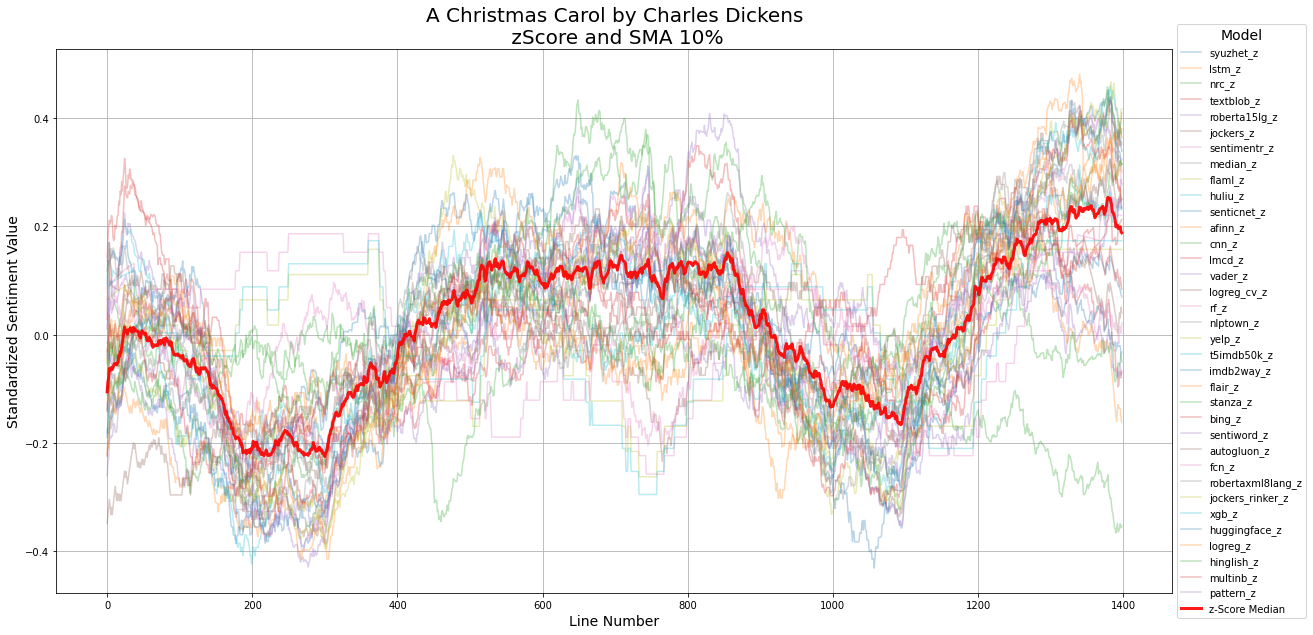

Processing Corpus: cdickens_greatexpectations...
Corpus #1 cdickens_greatexpectations with Model #0 syuzhet_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #1 lstm_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #2 nrc_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #3 textblob_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #4 roberta15lg_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #5 jockers_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #6 sentimentr_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #7 median_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #8 flaml_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #9 huliu_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #10 senticnet_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #11 afinn_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #12 cnn_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #13 lmcd_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #14 vader_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #15 logreg_cv_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #16 rf_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #17 nlptown_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #18 yelp_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #19 t5imdb50k_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #20 imdb2way_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #21 flair_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #22 stanza_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #23 bing_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #24 sentiword_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #25 autogluon_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #26 fcn_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #27 robertaxml8lang_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #28 jockers_rinker_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #29 xgb_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #30 huggingface_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #31 logreg_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #32 hinglish_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #33 multinb_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #34 pattern_z: has 40 columns but only 35 model columns


Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n zScore and SMA 10%')

Text(0.5, 0, 'Line Number')

Text(0, 0.5, 'Standardized Sentiment Value')

Saved plot to filepath: ./data_corpora_plots/plt_sma10_cdickens_greatexpectations.png




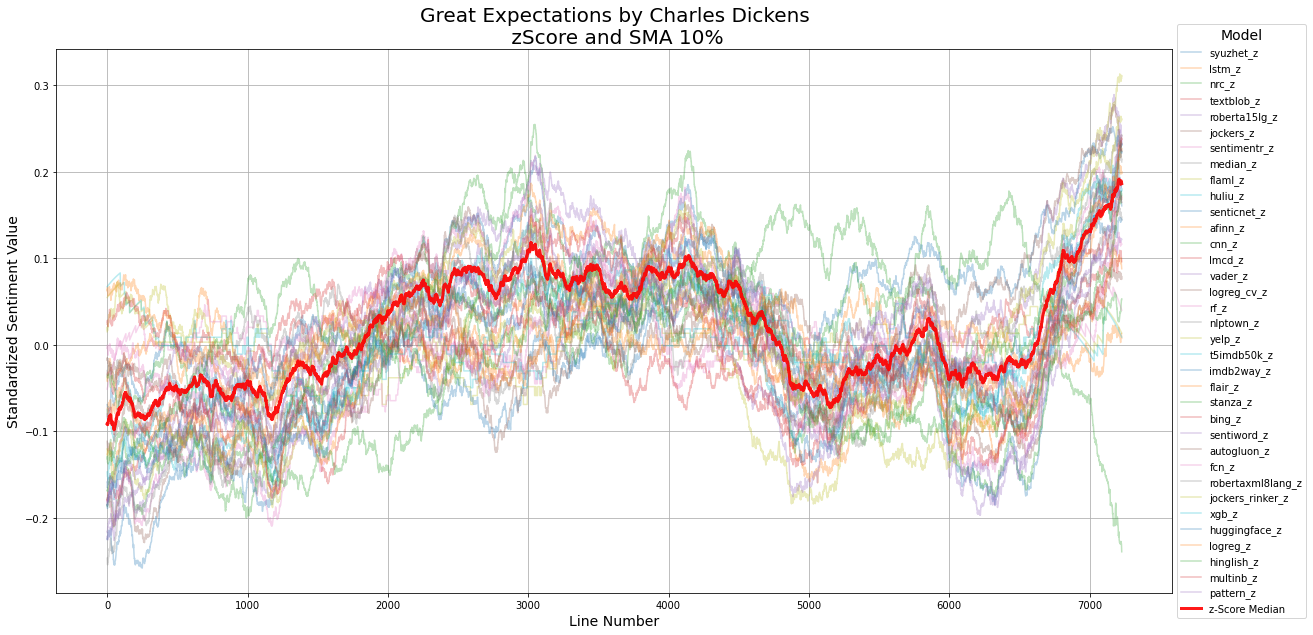

In [ ]:
# Plot zScore + SMA 10% for all Models in each Corpus (including bold median_z)


plt.rcParams["figure.figsize"] = (20,10)

save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # amodel_z = f'{amodel}_z'
    # corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'z-Score {amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'{amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)

  # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)
  ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)

  ax.grid(True)
  ax.set_title(f'{corpora_full_dt[acorpus]}\n zScore and SMA 10%', fontsize=20)
  # ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
  ax.set_xlabel('Line Number', fontsize=14)
  ax.set_ylabel('Standardized Sentiment Value', fontsize=14)
  # ax.set_xticklabels(us_impact_df.decade, size=30)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Model', title_fontsize=14);

  if save_plot:
    filename_plt = f'./{subdir_name}/plt_sma10_{acorpus}.png'
    plt.savefig(filename_plt)
    print(f'Saved plot to filepath: {filename_plt}\n\n')

  plt.show();

In [ ]:
"""

# Plot zScore + SMA 10% for all Models in each Corpus (including bold median_z)


plt.rcParams["figure.figsize"] = (20, 10)

save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]): # [:2]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # amodel_z = f'{amodel}_z'
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'z-Score {amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)

  corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=5.0)

  plt.title(f'{corpora_full_dt[acorpus]}\n zScore and SMA 10%', fontsize=20)    
  plt.legend(loc='best', fontsize=12, title='Model', title_fontsize=16)
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3.0)
  plt.xlabel = 'Novel Line Number'
  plt.ylabel = 'Standardized Sentiment Value'
  if save_plot:
    filename_plt = f'./{subdir_name}/plt_sma10_{acorpus}.png'
    plt.savefig(filename_plt)

  plt.show();

""";

## **Skip to [Save zScore] below**

In [ ]:
# Create list of all <model>_z DataFrames

pattern_z = re.compile(r'_z$')
pattern_zz = re.compile(r'_z_z$')
models_z_dt = {}
models_z_ls = []

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(f'Processing Corpus: {acorpus}')

  acorpus_model_ls = corpora_allz_dt[acorpus].columns
  for j, amodel in enumerate(acorpus_model_ls):

    # win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    if pattern_z.search(amodel) and not pattern_zz.search(amodel):
      models_z_ls.append(amodel)

  models_z_dt[acorpus] = copy.deepcopy(models_z_ls) # .copy(deep=True)
  models_z_ls = []

  print(f'models_z_dt[acorpus]: {models_z_dt[acorpus]}\n\n')


In [ ]:
models_z_dt['cdickens_achristmascarol']

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)

  models_z_ls = models_z_dt[acorpus]
  win10per = int(0.1*corpora_allz_dt[acorpus]['median_z'].shape[0])

  corpora_allz_dt[acorpus][models_z_ls].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  # atitle = f'{acorpus}\n z-Score SMA 10%'
  # ax.title(atitle)
  plt.title(f'{acorpus}\n z-Score SMA 10%')    
  plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_zsma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();  

In [ ]:

plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)
  # fig,ax = plt.subplots()

  for j, amodel in enumerate(model_cols_ls):

    # win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')
    win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    # Skip existing z-Scores
    if pattern_z.search(amodel):    

      # amodel_z = f'{amodel}_z'

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

      # corpora_all_dt[acorpus][amodel].astype(np.float64)
      # temp_df[amodel] = corpora_all_dt[acorpus][amodel].value.rolling(win10per, min_periods=1,center=True).apply(zscore)
      
      # temp_df[amodel] = pd.Series(type(stdscaler.fit_transform(np.asarray(corpora_all_dt[acorpus][amodel]).reshape(-1,1)))) # .reshape(-1,1))
      # print(f'temp_df[amodel]: {temp_df[amodel]}')
      # print(f'len(temp_df[amodel]: {len(temp_df[amodel])}')

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean().plot() # .mean().plot(label=amodel)

      # ax.plot(corpora_all_dt[acorpus][amodel_z].index, corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean(), label=amodel_z)
      # ax.set_xlabel('Sentence No.')
      # ax.set_ylabel('Sentiment (z-Score')
      # ax.legend(loc='best')

      # plt.title(f'{acorpus}\n z-Score SMA 10%')
      # plt.legend(loc='best') 
      pass

    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  atitle = f'{acorpus}\n z-Score SMA 10%'
  ax.title(atitle)
  # plt.title(f'{acorpus}\n z-Score SMA 10%')    
  # plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_sma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();

## **Patch TMorrison's Beloved Errors**

In [ ]:
corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
%whos dict

In [ ]:
corpora_sa_dt.keys()

In [ ]:
# TODO: Fix error (all 0) for tmorrison_beloved/pattern model (leads to NaN in zScore/SMA/LTTB)

corpora_sa_dt['baseline_tmorrison_beloved']['pattern'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].value_counts

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].rolling(400, center=True, min_periods=1).mean().plot()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].rolling(400, center=True, min_periods=1).mean().plot()

## **Save zScore/SMA 10% DataFrames**

In [ ]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_zall_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all_dt[acorpus].to_csv(fullpath_out)

cdickens_achristmascarol

Saving Corpus: cdickens_achristmascarol...
cdickens_greatexpectations

Saving Corpus: cdickens_greatexpectations...
ddefoe_robinsoncrusoe

Saving Corpus: ddefoe_robinsoncrusoe...
emforster_howardsend

Saving Corpus: emforster_howardsend...
fbaum_thewonderfulwizardofoz

Saving Corpus: fbaum_thewonderfulwizardofoz...
fdouglass_narrativelifeofaslave

Saving Corpus: fdouglass_narrativelifeofaslave...
fscottfitzgerald_thegreatgatsby

Saving Corpus: fscottfitzgerald_thegreatgatsby...
geliot_middlemarch

Saving Corpus: geliot_middlemarch...
hjames_portraitofalady

Saving Corpus: hjames_portraitofalady...
homer-ewilson_odyssey

Saving Corpus: homer-ewilson_odyssey...
imcewan_machineslikeme

Saving Corpus: imcewan_machineslikeme...
jausten_prideandprejudice

Saving Corpus: jausten_prideandprejudice...
jconrad_heartofdarkness

Saving Corpus: jconrad_heartofdarkness...
jjoyce_portraitoftheartist

Saving Corpus: jjoyce_portraitoftheartist...
jkrowling_1sorcerersstone

Sav

# **Identify Crux Points**

* https://pythonawesome.com/overview-of-the-peaks-dectection-algorithms-available-in-python/

* https://eddwardo.github.io/posts/2019-06-05-finding-local-extreams-in-pandas-time-series/

In [20]:
from scipy.signal import argrelextrema

In [23]:
plt.rcParams["figure.figsize"] = (20,10)

In [21]:
corpora_all_dt['cdickens_achristmascarol'].head(2)

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

In [22]:
corpus_root_ls[:3]

NameError: ignored

## **SMA**

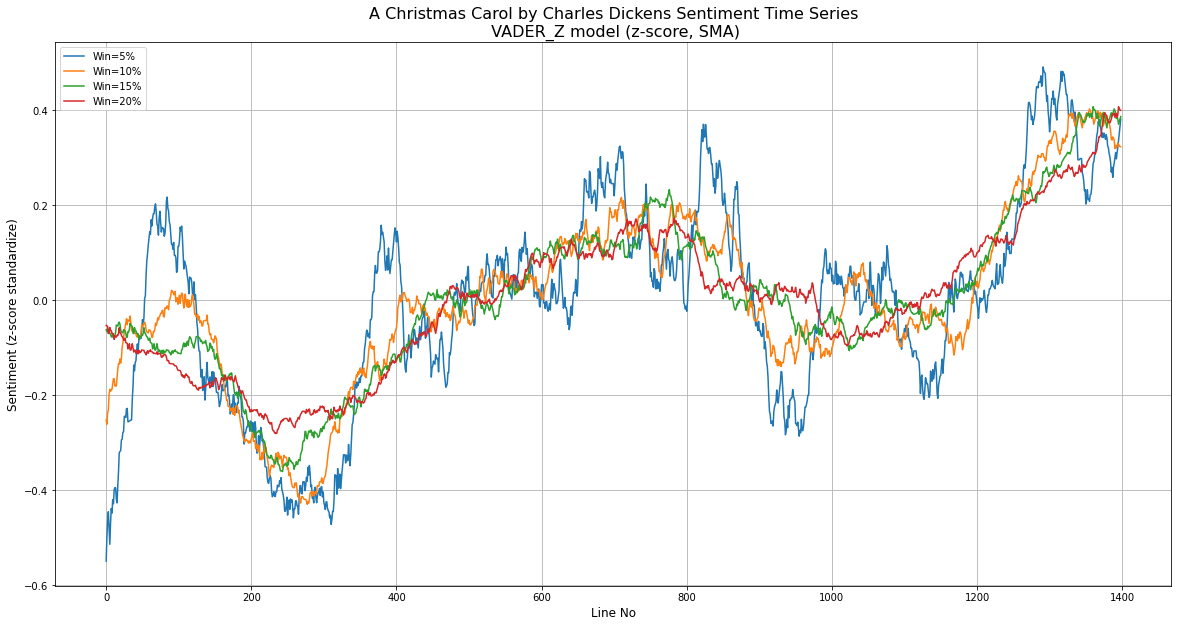

In [25]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

for i in range(1,5):
  win_size = i*win5_per
  win_per = 5*i
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series\n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show();

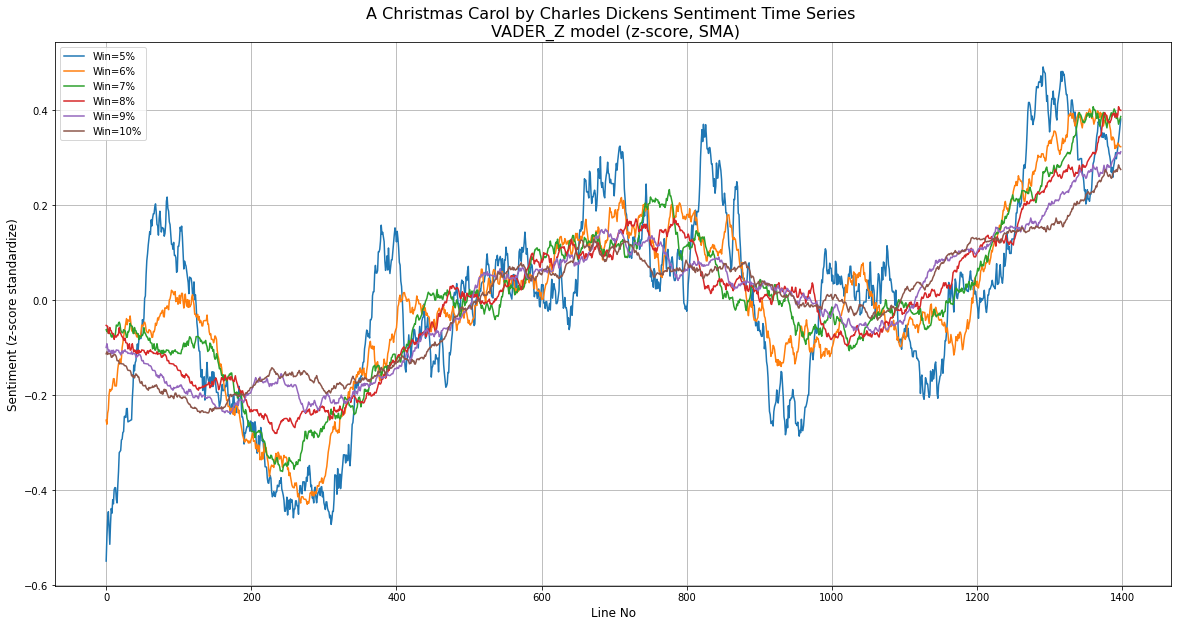

In [27]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)
win1_per = int(corpora_all_dt[acorpus].shape[0]*0.01)

for i in range(1,7):
  win_size = (i-1)*win1_per + win5_per
  win_per = 5 + (i-1)
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show();

In [30]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 5%)')

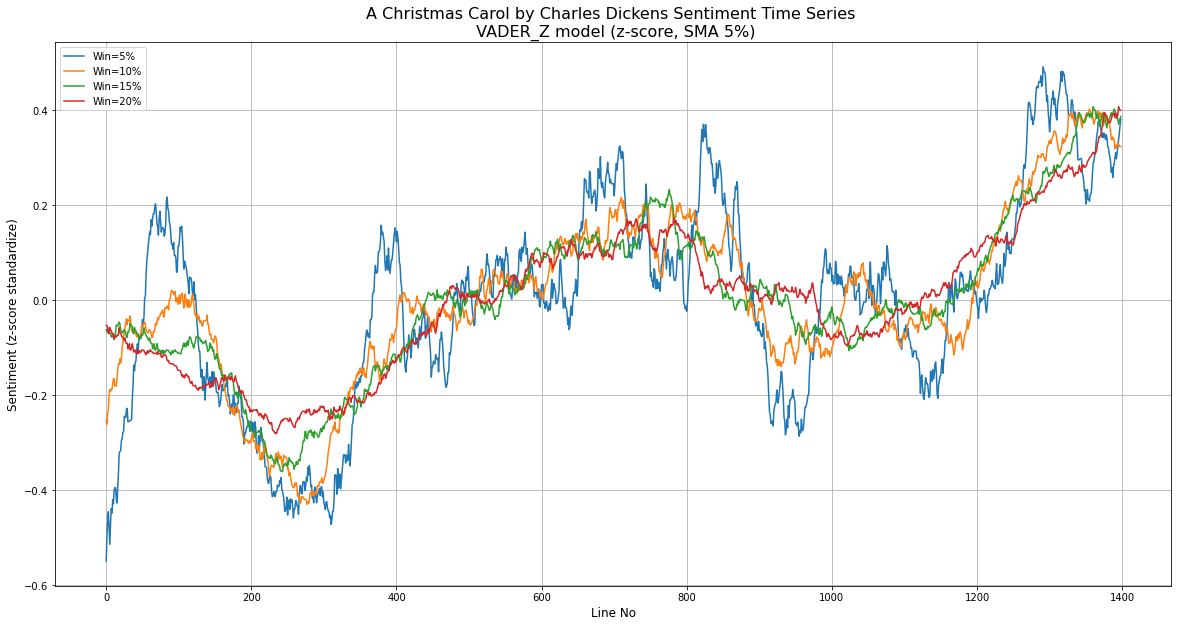

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 5%)')

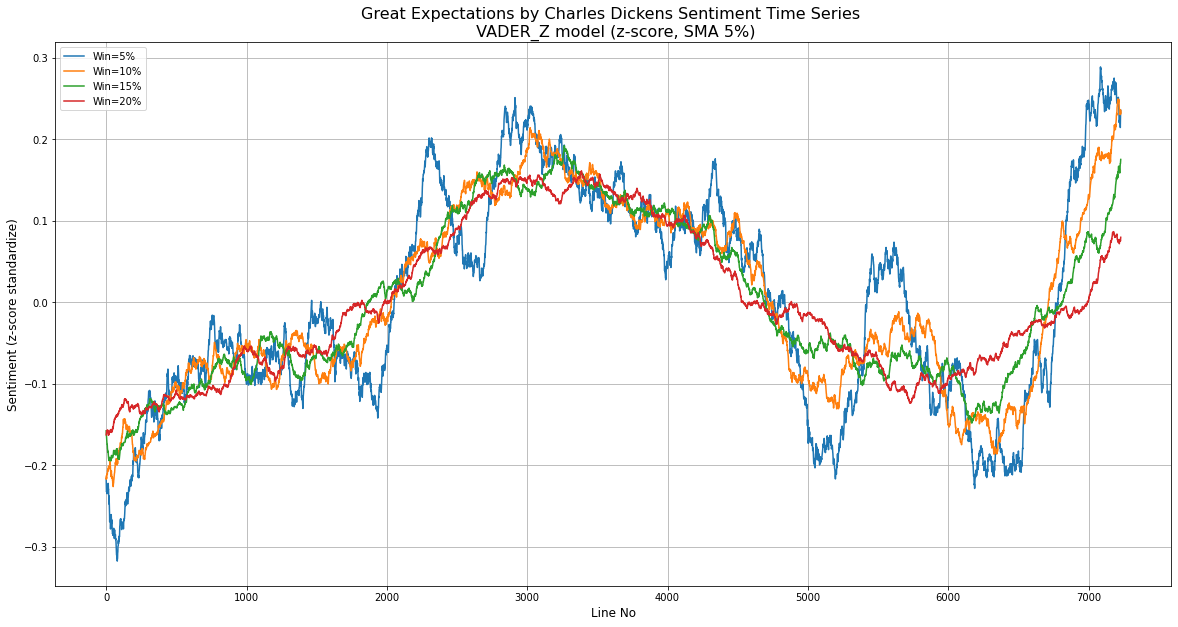

In [33]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

for i, acorpus in enumerate(corpora_ls[:2]): # corpus_root_ls[:2]):

  win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

  for i in range(1,5):
    win_size = i*win5_per
    win_per = 5*i
    corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
  plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
  plt.xlabel('Line No', fontsize=12)
  plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 5%)', fontsize=16)
  plt.grid(True)
  plt.legend(loc='best')
  plt.show();

In [ ]:
model_z_cols_ls

['syuzhet_z',
 'lstm_z',
 'nrc_z',
 'textblob_z',
 'roberta15lg_z',
 'jockers_z',
 'sentimentr_z',
 'median_z',
 'flaml_z',
 'huliu_z',
 'senticnet_z',
 'afinn_z',
 'cnn_z',
 'lmcd_z',
 'vader_z',
 'logreg_cv_z',
 'rf_z',
 'nlptown_z',
 'yelp_z',
 't5imdb50k_z',
 'imdb2way_z',
 'flair_z',
 'stanza_z',
 'bing_z',
 'sentiword_z',
 'autogluon_z',
 'fcn_z',
 'robertaxml8lang_z',
 'jockers_rinker_z',
 'xgb_z',
 'huggingface_z',
 'logreg_z',
 'hinglish_z',
 'multinb_z',
 'pattern_z']

In [ ]:
for i, acorpus in enumerate(corpora_ls[:2]): # corpus_root_ls[:2]):

  win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

  for i in range(1,3):
    win_size = i*win5_per
    win_per = 5*i
    for j, amodel in enumerate(model_z_cols_ls):
      corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'{amodel}: Win={win_per}%')
  plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
  plt.xlabel('Line No', fontsize=12)
  plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA 5%)', fontsize=16)
  plt.legend(loc='best')
  plt.grid(True)
  plt.show();

## **LOWESS**

* https://james-brennan.github.io/posts/lowess_conf/

In [36]:
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

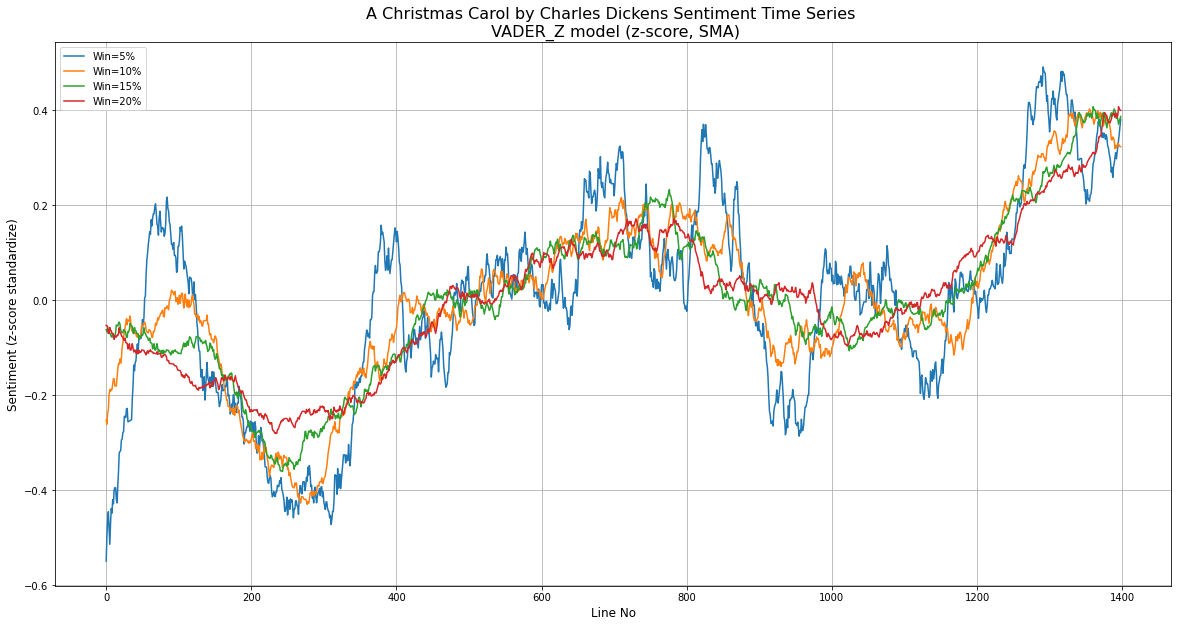

In [38]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

for i in range(1,5):
  win_size = i*win5_per
  win_per = 5*i
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show();

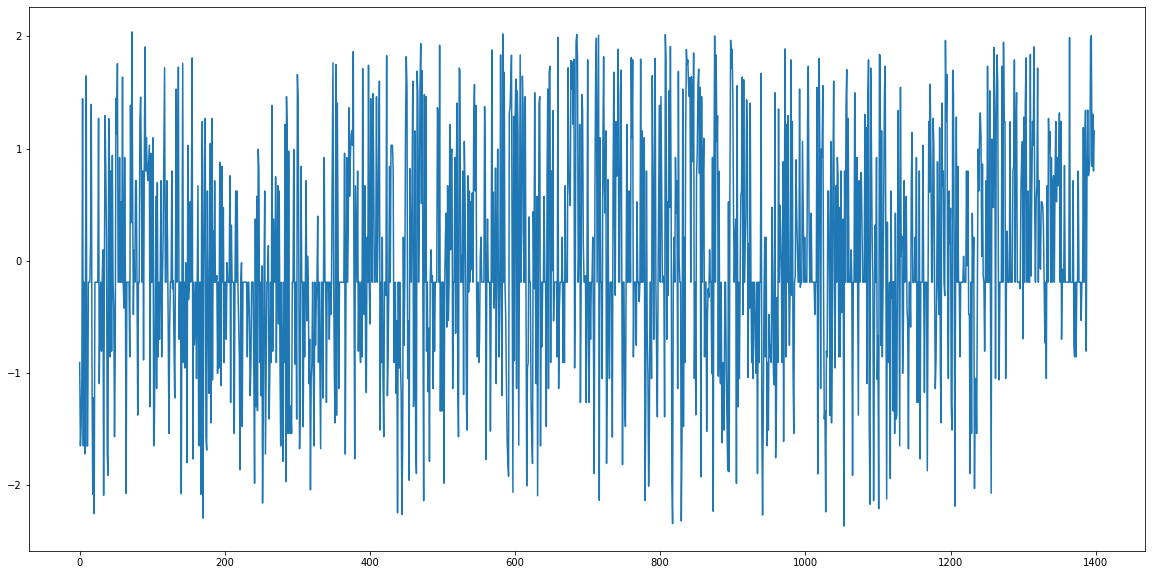

In [ ]:
corpora_all_dt[acorpus][amodel].plot()

In [39]:
for acorpus in corpora_ls:
  print(f'Corpus: {acorpus}')
  for amodel in model_z_cols_ls:
    amin = corpora_all_dt[acorpus][amodel].min()
    amax = corpora_all_dt[acorpus][amodel].max()
    print(f'    Model: {amodel}')
    print(f'      Min={amin:.2f}')
    print(f'      Max={amax:.2f}')

Corpus: cdickens_achristmascarol
    Model: flair_z
      Min=-0.87
      Max=1.34
    Model: nlptown_z
      Min=-1.16
      Max=1.71
    Model: lstm_z
      Min=-1.93
      Max=1.26
    Model: hinglish_z
      Min=-2.36
      Max=1.16
    Model: pattern_z
      Min=-3.29
      Max=2.47
    Model: fcn_z
      Min=-2.51
      Max=1.69
    Model: yelp_z
      Min=-1.17
      Max=2.07
    Model: rf_z
      Min=-4.53
      Max=0.22
    Model: robertaxml8lang_z
      Min=-1.42
      Max=1.62
    Model: vader_z
      Min=-2.36
      Max=2.04
    Model: huliu_z
      Min=-4.30
      Max=4.80
    Model: sentiword_z
      Min=-5.58
      Max=8.19
    Model: multinb_z
      Min=-1.12
      Max=0.89
    Model: imdb2way_z
      Min=-2.18
      Max=0.58
    Model: cnn_z
      Min=-4.77
      Max=4.46
    Model: bing_z
      Min=-4.71
      Max=4.66
    Model: jockers_rinker_z
      Min=-3.43
      Max=4.12
    Model: jockers_z
      Min=-3.77
      Max=4.39
    Model: roberta15lg_z
      Min=-0.99

### **Crux Points**

In [40]:
import matplotlib

In [41]:
def merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls):
  '''
  Given a 4 lists: x/y with min/max
  Return one DataFrame with all merged and sorted by ascending line_no
  '''

  # For Crux Minimums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points
  crux_min_dist_ls = []

  crux_min_len = len(crux_x_min_ls)
  crux_type_ls = ['min']*crux_min_len

  for amin_crux in crux_x_min_ls:
    amin_crux_dist = abs(sm_y_20frac[amin_crux] - sm_y_05frac[amin_crux])
    crux_min_dist_ls.append(amin_crux_dist)
    # print(f'At Line: {amin_crux} the abs(base-extreme) distance: {amin_crux_dist}')

  # crux_min_dist_ls.sort(reverse=True)

  crux_min_points_df = pd.DataFrame(
      {'type' : crux_type_ls,
      'line_no' : crux_x_min_ls,
      'dist' : crux_min_dist_ls})


  # For Crux Maximums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points
  crux_max_dist_ls = []

  crux_max_len = len(crux_x_max_ls)
  crux_type_ls = ['max']*crux_max_len

  for amax_crux in crux_x_max_ls:
    amax_crux_dist = abs(sm_y_20frac[amax_crux] - sm_y_05frac[amax_crux])
    crux_max_dist_ls.append(amax_crux_dist)
    # print(f'At Line: {amax_crux} the abs(base-extreme) distance: {amax_crux_dist}')

  # crux_max_dist_ls.sort(reverse=True)

  crux_max_points_df = pd.DataFrame(
      {'type' : crux_type_ls,
      'line_no' : crux_x_max_ls,
      'dist' : crux_max_dist_ls})

  # Save all merged/sorted min+max crux points
  crux_all_points_df = crux_min_points_df.append(crux_max_points_df, ignore_index=True)

  crux_all_points_df.sort_values(by='line_no', inplace=True)

  line_ls = crux_all_points_df['line_no'].to_list()
  line_first = min(line_ls)
  line_last = max(line_ls)

  return crux_all_points_df


In [42]:
def prune_cruxes(crux_df, min_pair_dist):
  '''
  Give a DataFrame of Cruxes and min distance between adjacent Cruxes
  Return the original DataFrame with all close pairs removed (preserving first and last Cruxes)
  '''
  pass
  
  return 

In [43]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

Processing Corpus: cdickens_greatexpectations...
Corpus #0 cdickens_greatexpectations with Model #0 flair_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 10%, peak_halfwin=10%)')

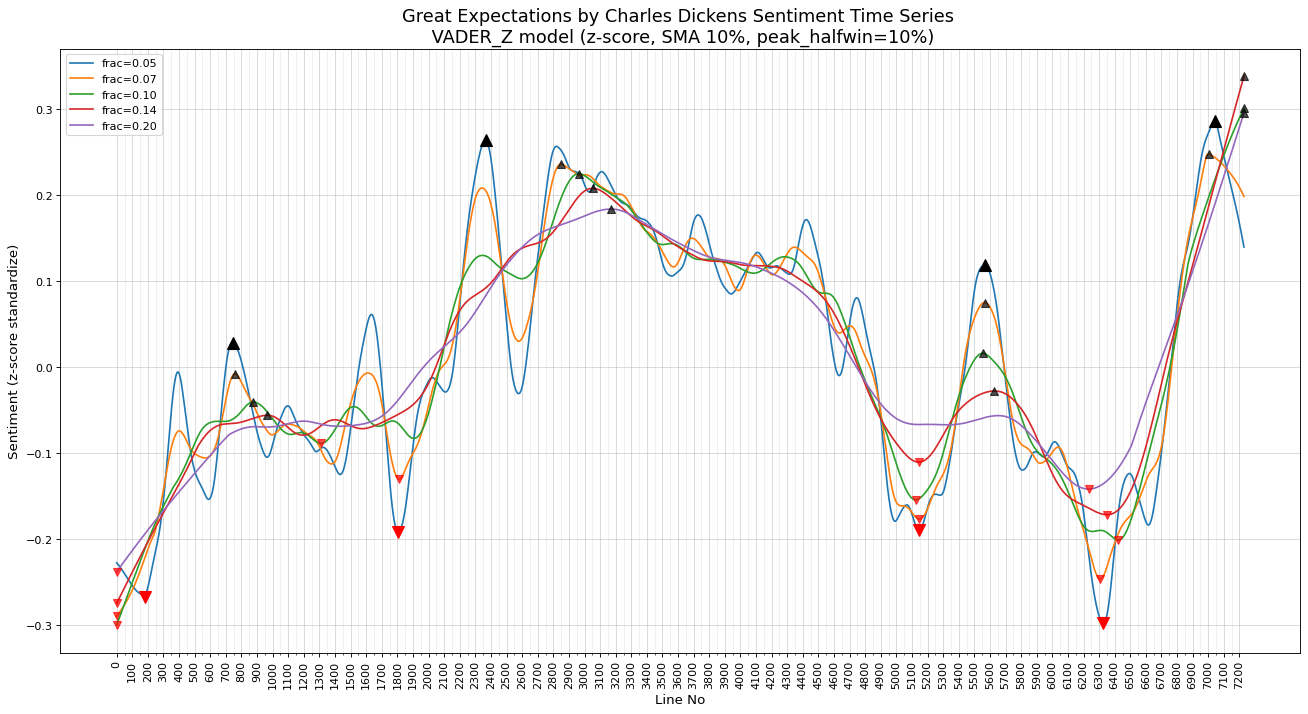

In [83]:
save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()
temp_crux_dt = {}

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin_per = 10
min_pair_dist_per = 5

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      # if (afrac == 1./5.):
      #   sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      # sm_y_20frac = sm_y.copy()
      crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
      crux_y_min_ls = sm_y[crux_x_min_ls]
      crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
      crux_y_max_ls = sm_y[crux_x_max_ls]

      # temp_crux_df = pd.DataFrame()
      # Create merged and sorted temp Crux DataFrame 
      afrac_str = str(int(1/afrac))
      temp_crux_dt[afrac_str] = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)

      # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
      # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

      # Plot LOWESS curve
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')

      # Plot Crux markers
      if (afrac == 1./20.):
        # Plot 
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)
      else:
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=7, alpha=0.7)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=7, alpha=0.7)           

      # corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      # lowess_dt[corpus_model_frac_key] = sm_y

      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    # Save Dictionary of all frac curve Cruxes for each 'acorpus::amodel' combination
    corpus_model_key = f'{acorpus}::{amodel}' # '::{str(int(1/afrac))}'
    corpora_crux_dt[corpus_model_key] = temp_crux_dt

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();

In [ ]:
"""
save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()
temp_crux_dt = {}

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin_per = 5
min_pair_dist_per = 5

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      # if (afrac == 1./5.):
      #   sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      # sm_y_20frac = sm_y.copy()
      crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
      crux_y_min_ls = sm_y[crux_x_min_ls]
      crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
      crux_y_max_ls = sm_y[crux_x_max_ls]

      # temp_crux_df = pd.DataFrame()
      # Create merged and sorted temp Crux DataFrame 
      afrac_str = str(int(1/afrac))
      temp_crux_dt[afrac_str] = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)

      # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
      # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

      # Plot LOWESS curve
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')

      # Plot Crux markers
      if (afrac == 1./20.):
        # Plot 
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)
      else:
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=7, alpha=0.7)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=7, alpha=0.7)           

      # corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      # lowess_dt[corpus_model_frac_key] = sm_y

      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    # Save Dictionary of all frac curve Cruxes for each 'acorpus::amodel' combination
    corpus_model_key = f'{acorpus}::{amodel}' # '::{str(int(1/afrac))}'
    corpora_crux_dt[corpus_model_key] = temp_crux_dt

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();
""";

In [84]:
corpora_crux_dt.keys()

dict_keys(['cdickens_greatexpectations::vader_z'])

In [85]:
corpora_crux_dt['cdickens_greatexpectations::vader_z'].keys()

dict_keys(['20', '15', '10', '7', '5'])

In [86]:
corpora_crux_dt['cdickens_greatexpectations::vader_z']['20']

type  line_no  dist
0  min      180   0.0
4  max      745   0.0
1  min     1806   0.0
5  max     2365   0.0
2  min     5145   0.0
6  max     5565   0.0
3  min     6326   0.0
7  max     7042   0.0

In [87]:
# Combine all Cruxes from each frac curve into one DataFrame

acorpus_amodel = 'cdickens_greatexpectations::vader_z'

temp_all_df = pd.DataFrame()
temp_df = pd.DataFrame()

print(f'Processing acorpus::amodel = {acorpus_amodel}')
for afrac, acrux_df in corpora_crux_dt[acorpus_amodel].items():
  print(f'  for frac={afrac}')
  temp_df = acrux_df
  temp_df['frac'] = [afrac] * temp_df.shape[0]
  temp_all_df = temp_all_df.append(temp_df, ignore_index='True')

temp_all_df.head(60)
temp_all_df.info()

Processing acorpus::amodel = cdickens_greatexpectations::vader_z
  for frac=20
  for frac=15
  for frac=10
  for frac=7
  for frac=5


type  line_no  dist frac
0   min      180   0.0   20
1   max      745   0.0   20
2   min     1806   0.0   20
3   max     2365   0.0   20
4   min     5145   0.0   20
5   max     5565   0.0   20
6   min     6326   0.0   20
7   max     7042   0.0   20
8   min        0   0.0   15
9   max      759   0.0   15
10  min     1812   0.0   15
11  max     2850   0.0   15
12  min     5147   0.0   15
13  max     5566   0.0   15
14  min     6307   0.0   15
15  max     7003   0.0   15
16  min        0   0.0   10
17  max      877   0.0   10
18  min     1311   0.0   10
19  max     2963   0.0   10
20  min     5124   0.0   10
21  max     5554   0.0   10
22  min     6422   0.0   10
23  max     7229   0.0   10
24  min        0   0.0    7
25  max      965   0.0    7
26  max     3052   0.0    7
27  min     5142   0.0    7
28  max     5628   0.0    7
29  min     6351   0.0    7
30  max     7229   0.0    7
31  min        0   0.0    5
32  max     3169   0.0    5
33  min     6232   0.0    5
34  max     7229   0.0    5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   type     35 non-null     object 
 1   line_no  35 non-null     int64  
 2   dist     35 non-null     float64
 3   frac     35 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


Processing Corpus: cdickens_greatexpectations...
Corpus #0 cdickens_greatexpectations with Model #0 flair_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 10%, peak_halfwin=5%)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_greatexpectations_vader_z_5.png




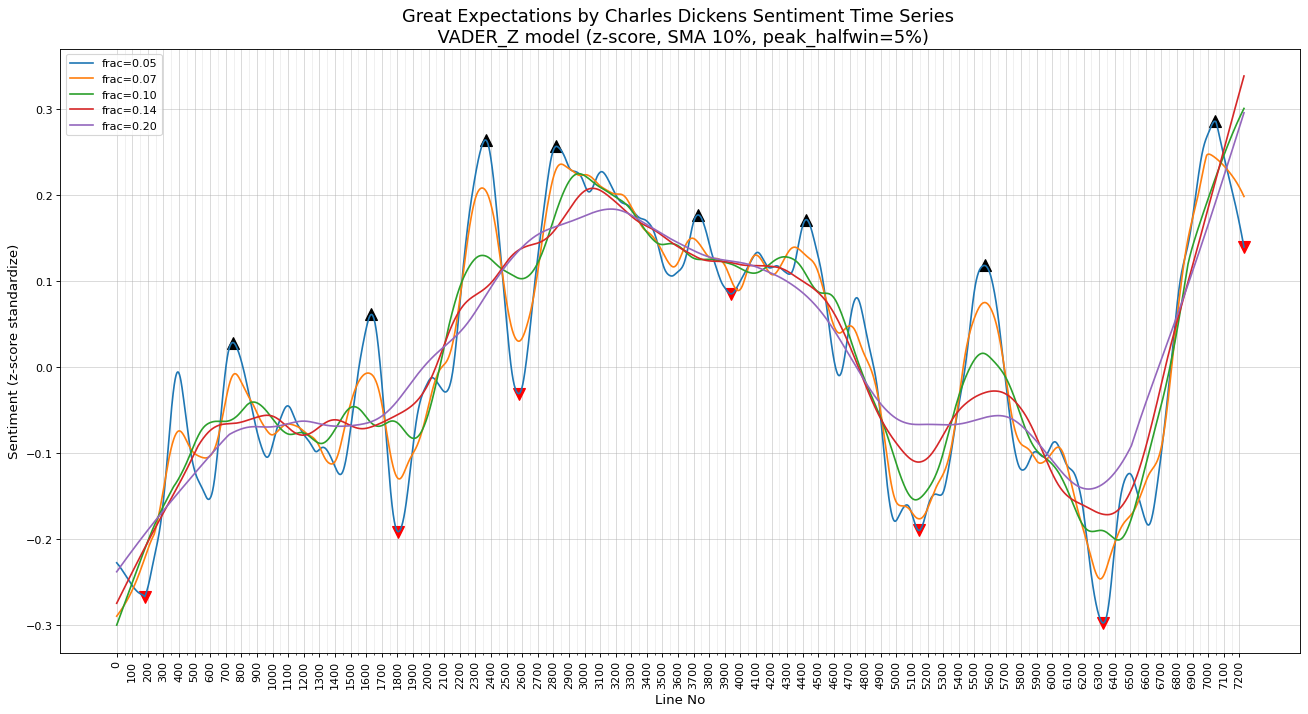

In [58]:
save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin_per = 5
min_pair_dist_per = 5

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')



    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      if (afrac == 1./5.):
        sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      afrac_str = str(1/afrac)

      if (afrac == 1./20.):
        sm_y_20frac = sm_y.copy()
        crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
        crux_y_min_ls = sm_y[crux_x_min_ls]
        crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
        crux_y_max_ls = sm_y[crux_x_max_ls]

        temp_crux_df = pd.DataFrame()
        # Create merged and sorted temp Crux DataFrame 
        corpus_model_frac_key = f'{acorpus}::{amodel}::{str(int(1/afrac))}'
        temp_crux_df = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)
        # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
        # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)
        # Save 
        corpora_crux_dt[corpus_model_frac_key] = temp_crux_df
        # Plot 
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

      corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      lowess_dt[corpus_model_frac_key] = sm_y
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();

In [53]:
corpora_crux_dt.keys()

dict_keys(['cdickens_greatexpectations::vader_z::20'])

In [59]:
corpora_crux_dt['cdickens_greatexpectations::vader_z::20']

type  line_no      dist
0   min      180  0.072891
7   max      745  0.104661
8   max     1633  0.124682
1   min     1806  0.153339
9   max     2365  0.181201
2   min     2578  0.166230
10  max     2820  0.093137
11  max     3728  0.043827
3   min     3940  0.038172
12  max     4422  0.088734
4   min     5145  0.123203
13  max     5565  0.176930
5   min     6326  0.161791
14  max     7042  0.096635
6   min     7229  0.156206

In [54]:
corpora_crux_dt['cdickens_greatexpectations::vader_z::20'].head(20)
corpora_crux_dt['cdickens_greatexpectations::vader_z::20'].shape

AttributeError: ignored

Processing Corpus: cdickens_achristmascarol...
Corpus #0 cdickens_achristmascarol with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_achristmascarol_vader_z.png




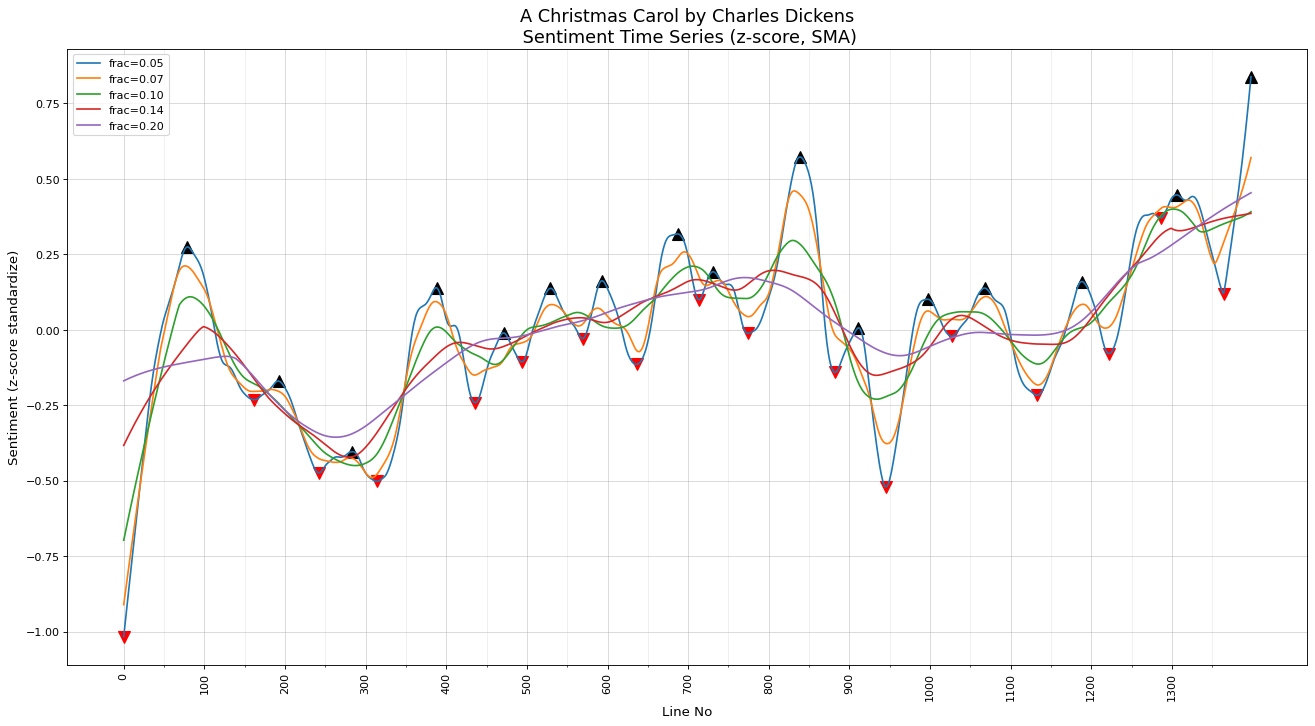

Processing Corpus: cdickens_greatexpectations...
Corpus #1 cdickens_greatexpectations with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_greatexpectations_vader_z.png




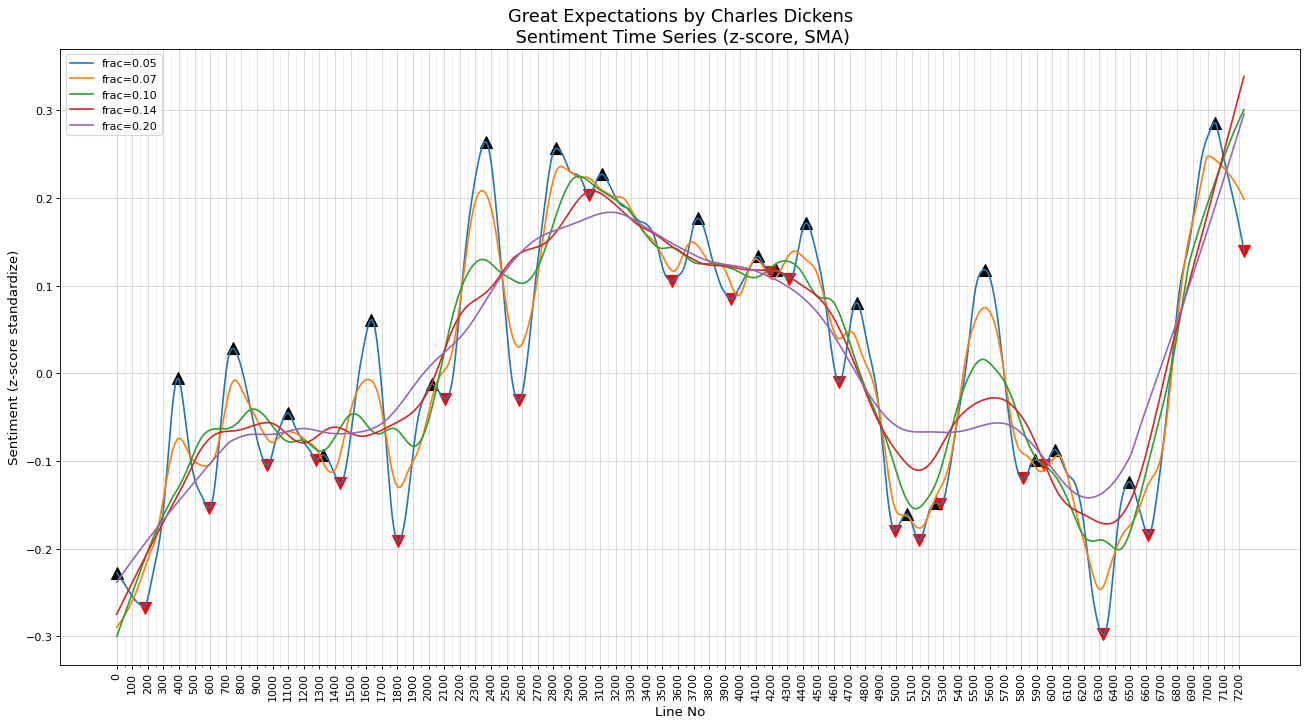

Processing Corpus: ddefoe_robinsoncrusoe...
Corpus #2 ddefoe_robinsoncrusoe with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Robinson Crusoe by Daniel Defoe\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_ddefoe_robinsoncrusoe_vader_z.png




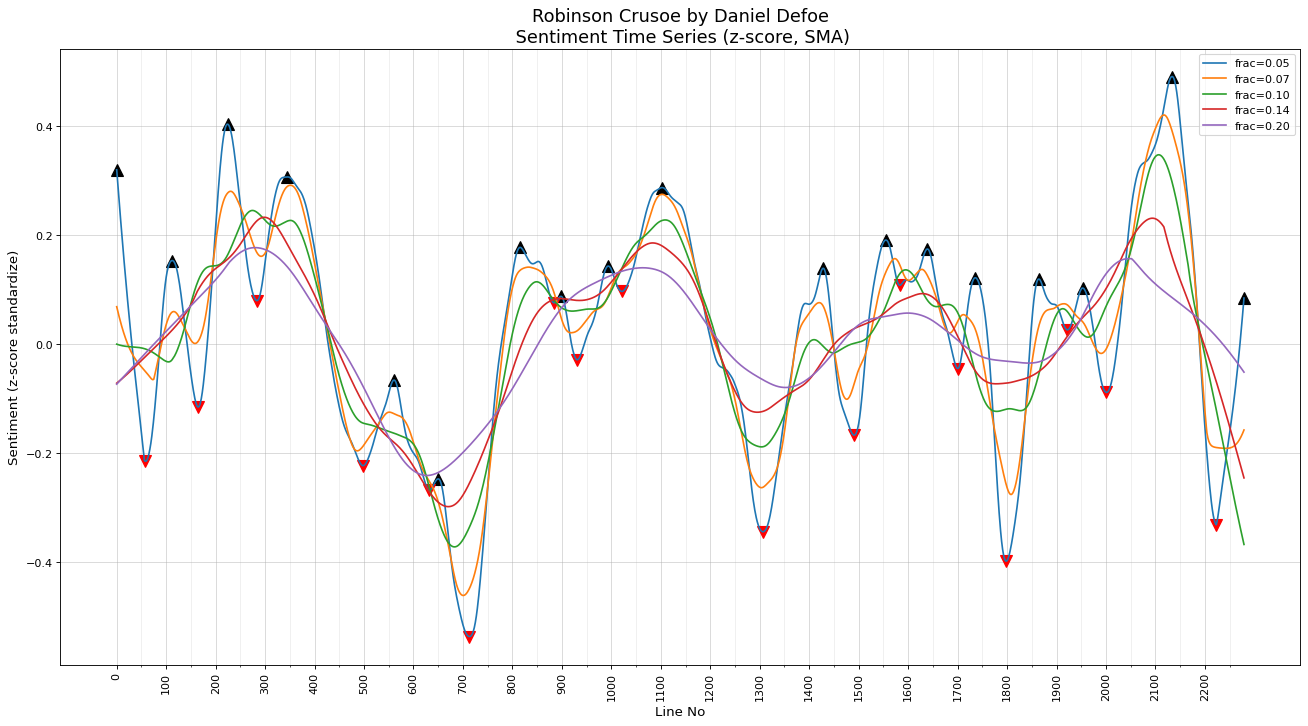

In [228]:
save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin = 20

lowess_dt = {}


for i, acorpus in enumerate(corpora_ls[:3]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')



    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      if (afrac == 1./5.):
        sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      if (afrac == 1./20.):
        sm_y_20frac = sm_y.copy()
        crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
        crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

      corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      lowess_dt[corpus_model_frac_key] = sm_y
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();

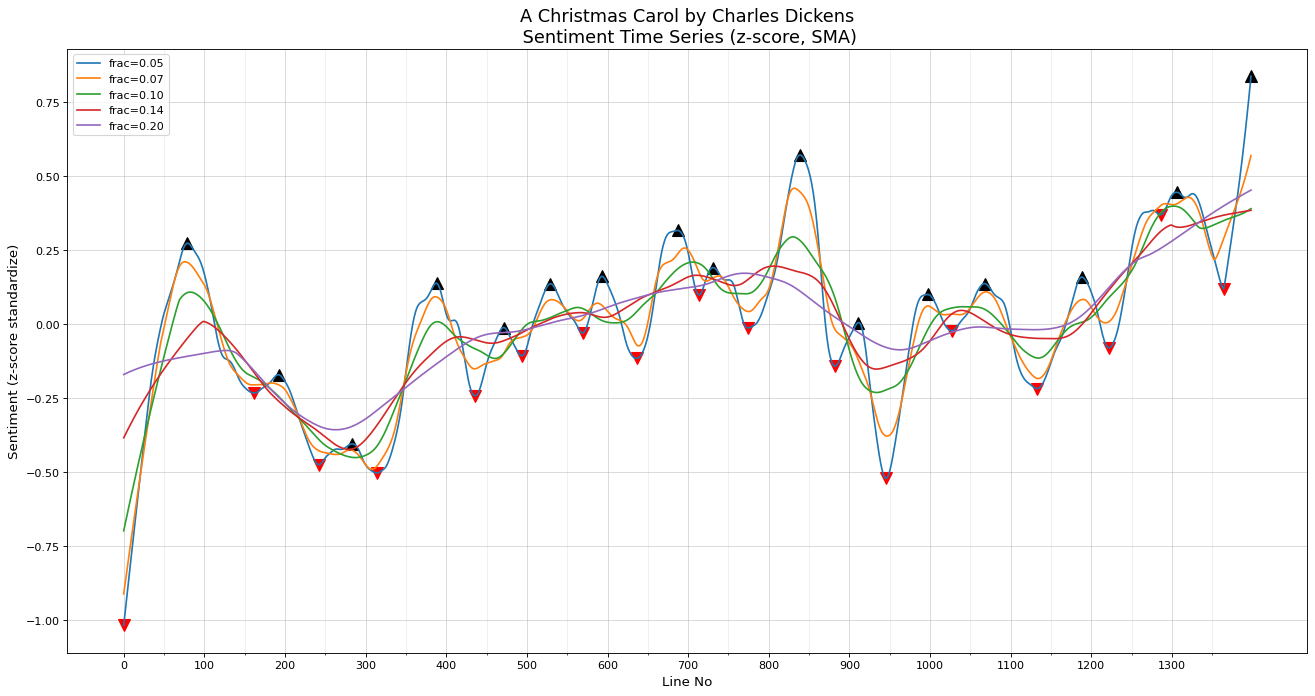

In [ ]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin = 20

lowess_dt = {}

y = corpora_all_dt[acorpus][amodel]
x_len = len(corpora_all_dt[acorpus][amodel])
x = range(x_len)

# Crux LOWESS Extrema (frac=1./5.)
crux_x_min_ls = []
crux_x_max_ls = []
# Smoothed LOWESS Extrema (frac=1./5.)
sm_y_05frac = np.empty(shape=(x_len))
# Smoothed LOWESS Baseline (frac=1./20.)
sm_y_20frac = np.empty(shape=(x_len))

# frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
# NOTE: Order dependent, need to get baseline 1./20. first to calc distances
frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


# fig, ax = plt.subplots(figsize=(20, 10))

fig = plt.figure(figsize=(20, 10), dpi=80)
ax = fig.add_subplot(111)
# lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

for i,afrac in enumerate(frac_ls):
  # afrac = 1./frac_div
  sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

  # Set axis ranges; by default this will put major ticks every 25.
  # ax.set_xlim(0, len(sm_x))
  # ax.set_ylim(0, len(sm_y))

  # Get Baseline arc (frac = 1./20.)
  if (afrac == 1./5.):
    sm_y_05frac = sm_y.copy()

  # Get Peaks and Distance from Baseline 
  # if i == len(frac_ls) - 1:
  if (afrac == 1./20.):
    sm_y_20frac = sm_y.copy()
    crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
    crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
    plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
    plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

  corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
  lowess_dt[corpus_model_frac_key] = sm_y
  lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
  

  # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
  # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA)', fontsize=16)
plt.legend(loc='best')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, x_len, 100)
minor_ticks = np.arange(0, x_len, 50)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

# plt.grid(True)
# plt.grid(True, alpha=0.3, markevery=100)
plt.show();

In [ ]:
temp_df = pd.DataFrame(sm_y_20frac)
temp_df.plot()

In [ ]:
crux_x_min_ls

array([   0,  162,  242,  314,  436,  494,  569,  636,  714,  774,  882,
        945, 1027, 1133, 1222, 1286, 1364])

In [ ]:
crux_x_max_ls

array([  79,  192,  283,  388,  471,  529,  593,  687,  731,  839,  911,
        997, 1068, 1188, 1306, 1398])

### **Crux Distance from Baseline**

In [ ]:
# For Crux Minimums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points

crux_min_dist_ls = []

crux_min_len = len(crux_x_min_ls)
crux_type_ls = ['min']*crux_min_len

for amin_crux in crux_x_min_ls:
  amin_crux_dist = abs(sm_y_20frac[amin_crux] - sm_y_05frac[amin_crux])
  crux_min_dist_ls.append(amin_crux_dist)
  # print(f'At Line: {amin_crux} the abs(base-extreme) distance: {amin_crux_dist}')

# crux_min_dist_ls.sort(reverse=True)

crux_min_points_df = pd.DataFrame(
    {'type' : crux_type_ls,
     'line_no' : crux_x_min_ls,
     'dist' : crux_min_dist_ls})

# crux_min_points_df

In [ ]:
# For Crux Maximums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points

crux_max_dist_ls = []

crux_max_len = len(crux_x_max_ls)
crux_type_ls = ['max']*crux_max_len

for amax_crux in crux_x_max_ls:
  amax_crux_dist = abs(sm_y_20frac[amax_crux] - sm_y_05frac[amax_crux])
  crux_max_dist_ls.append(amax_crux_dist)
  # print(f'At Line: {amax_crux} the abs(base-extreme) distance: {amax_crux_dist}')

# crux_max_dist_ls.sort(reverse=True)

crux_max_points_df = pd.DataFrame(
    {'type' : crux_type_ls,
     'line_no' : crux_x_max_ls,
     'dist' : crux_max_dist_ls})

# crux_max_points_df.head(30)

In [ ]:
# Vertically concatenate and reverse sort the Min and Max Crux Distance DataFrames

crux_points_df = crux_max_points_df.append(crux_min_points_df, ignore_index=True)
crux_points_df.sort_values('dist', ascending=False, inplace=True)
crux_points_df

type  line_no      dist
16  min        0  0.847515
9   max      839  0.460519
27  min      945  0.442837
15  max     1398  0.384705
0   max       79  0.381993
32  min     1364  0.280287
3   max      388  0.272375
19  min      314  0.211609
30  min     1222  0.204383
23  min      636  0.203633
29  min     1133  0.199100
7   max      687  0.198619
20  min      436  0.194605
25  min      774  0.184525
26  min      882  0.165882
11  max      997  0.159400
14  max     1306  0.153523
12  max     1068  0.147132
5   max      529  0.132772
18  min      242  0.130430
13  max     1188  0.129832
31  min     1286  0.113899
6   max      593  0.111529
21  min      494  0.085692
1   max      192  0.075958
17  min      162  0.074248
2   max      283  0.059145
22  min      569  0.059069
8   max      731  0.048029
10  max      911  0.033735
24  min      714  0.030438
4   max      471  0.017236
28  min     1027  0.004982

### **Crux Confidence Level**

* Normed agreement between Baseline-Extrema LOWESS arcs

### **Crux Directional Neighborhood**

* Direction
* Span
* Peaks

### **Crux Neighborhood Coherence**

* SBert: https://www.sbert.net/docs/pretrained_models.html 
* Top2Vec: https://github.com/ddangelov/Top2Vec
* BERTopic: https://github.com/MaartenGr/BERTopic


# **END OF NOTEBOOK**

In [ ]:
ilocs_min = argrelextrema(df.price.values, np.less_equal, order=3)[0]
ilocs_max = argrelextrema(df.price.values, np.greater_equal, order=3)[0]

df.price.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].price.plot(style='.', lw=10, color='red', marker="v");
df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

In [ ]:
lowess_dt.keys()

dict_keys(['cdickens_achristmascarol:vader_z:0.20', 'cdickens_achristmascarol:vader_z:0.14', 'cdickens_achristmascarol:vader_z:0.10', 'cdickens_achristmascarol:vader_z:0.07', 'cdickens_achristmascarol:vader_z:0.05'])

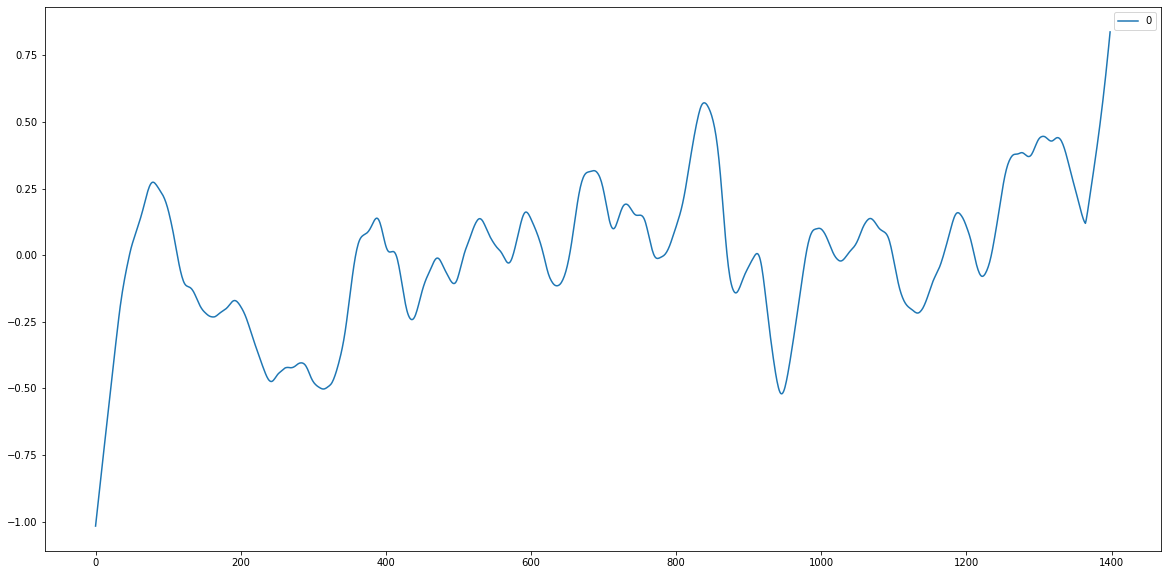

In [ ]:
temp_df = pd.DataFrame(lowess_dt['cdickens_achristmascarol:vader_z:0.05'])
temp_df.plot()

# **Model-Corpus Compatibility (MCC) per Corpus**

MCC(corpus) = 1 / ( | amodel(corpus)- median(corpus) | / len(corpus) )

For each Corpus, compute a Coherence Metric for all Models by:
* Computing the Euclidian Distance of each zScore/SMA Model from the zScore/SMA Median
* Sum all Euclidian Distances 
* Identify and record furtherest outliers per Corpus/Model
* Sum all Euclidian Distances after removing 2-3 of ~35 outliers (5-10% discard)
* Normalize 2 Sums of Euclidian Distances over the entire set of Corpora
* Rank order the Corpora in terms of Coherence
* Rank Order Models in terms of Outlier frequency

In [ ]:
%whos list

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].info()

In [ ]:
model_z_cols_ls

In [ ]:
np.sum(np.abs(corpora_all_dt['cdickens_achristmascarol']['vader_z'] - corpora_all_dt['cdickens_achristmascarol']['median_z']))

In [ ]:
# Calculate MCC Metric for each corpus:model combination

subdir_out = 'data_corpora_all'

median_model_area_ls = []
mcc_ls = []                   # Model-Corpus Compatibility (MCC) 

corpora_median_area_dt = {}
corpora_mcc_dt = {}

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus #{i}: {acorpus}')

  # median_model_area_ls = []
  mcc_ls = []

  for j, amodel_z in enumerate(model_z_cols_ls):
    print(f'  with Model #{j}: {amodel_z}')

    median_model_area = np.sum(np.abs(corpora_all_dt[acorpus][amodel_z] - corpora_all_dt[acorpus]['median_z']))
    print(f'    Area between Median: {median_model_area}')

    mcc = 1 / (median_model_area / corpora_all_dt[acorpus].shape[0])

    # median_model_area_ls.append((amodel_z, median_model_area))
    mcc_ls.append((amodel_z, mcc)) 
    # print(f'      Growing list: {median_model_area_ls}')
    print(f'      Growing mcc_ls: {mcc_ls}')

  # median_model_area_sorted_ls = copy.deepcopy(median_model_area_ls) # .sort(key=lambda x:x[1]) #  # .sort(key=lambda x: float(x[1])) # .sort(key=lambda y: y[1]) # .sort(key=lambda y: y[1])
  # median_model_area_sorted_ls.sort(key=lambda x:x[1], reverse=True)
  # print(f'        Copying sorted list: {median_model_area_sorted_ls}')

  mcc_sorted_ls = copy.deepcopy(mcc_ls) # .sort(key=lambda x:x[1]) #  # .sort(key=lambda x: float(x[1])) # .sort(key=lambda y: y[1]) # .sort(key=lambda y: y[1])
  # median_model_area_sorted_ls.sort(key=lambda x:x[1], reverse=True)
  print(f'        Copying sorted list: {mcc_sorted_ls}')


  # corpora_median_area_dt[acorpus] = copy.deepcopy(median_model_area_sorted_ls)

  corpora_mcc_dt[acorpus] = copy.deepcopy(mcc_sorted_ls)

  # corpora_all_dt[acorpus][model_z_cols_ls].head(2)

  # TODO: Check for NaN and Impute

  # corpora_all_dt[acorpus]['all_z_std'] = corpora_all_dt[acorpus][model_z_cols_ls].std(axis=1)

  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  # filename_out = f'models_all_{acorpus}.csv'
  # fullpath_out = f'./{subdir_out}/{filename_out}'

  # print(f'\nSaving Corpus: {acorpus}...')
  # corpora_all_dt[acorpus].to_csv(fullpath_out)

In [ ]:
corpora_mcc_dt['cdickens_greatexpectations']

In [ ]:
corpora_mcc_df.head()

In [ ]:
corpora_mcc_df.shape

In [ ]:
corpora_ls

## **MCC Ranked Models for Each Corpus**

In [ ]:
print(temp_maxmcc_df.model_z.to_list())

In [ ]:

plt.rcParams["figure.figsize"] = (10, 8)

save_plot = False

maxmc_dt = {}

for acorpus in corpora_ls:

  temp_df = corpora_mcc_df[corpora_mcc_df['corpus']==acorpus]
  temp_df = temp_df.sort_values('mcc', ascending=False)
  temp_df = temp_df[temp_df.model_z != 'median_z']
  # print(f'temp_df: {temp_df.shape}')
  # if (acorpus == 'cdickens_achristmascarol'):
  temp_maxmcc_df = temp_df[['model_z','mcc']].reset_index(drop=True)
  maxmc_dt[acorpus] = temp_maxmcc_df.copy(deep=True)
  # print(f'For Corpus: {acorpus}:\n\n  {maxmc_dt[acorpus]}')
  # model_ls = temp_df['model_z']
  # mcc_ls = temp_df['mcc']
  # merged_list = tuple(zip(model_ls, mcc_ls)) 
  # print(f'merged_list: {merged_list}')

  # temp_maxmcc_df.plot()
  # plt.title(f'{acorpus.upper()} MCC Ranked Models')
  # plt.legend('off')
  # plt.xticks('model_z')

  # fig, ax = plt.subplots(1, 1)
  # fig = plt.figure()
  # ax = fig.add_subplot(111)

  ax = temp_maxmcc_df.plot(label=acorpus, linewidth=3)
  # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)

  ax.grid(True)
  ax.set_title(f'Model Rank by MCC: {acorpus}', fontsize=18)
  # ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
  # ax.set_xlabel('Line Number', fontsize=14)
  ax.set_ylabel('MCC Score', fontsize=14)
  # ax.set_xticks(df.Date.values)
  # xticks_ls = temp_maxmcc_df.model_z.to_list()
  # ax.set_xticklabels(temp_maxmcc_df.model_z.values, size=8, rotation=90)
  ax.set_xticklabels(temp_maxmcc_df.model_z, rotation=90) # , size=8, rotation=90)
  # ax.set_xticklabels(xticks_ls, size=6, rotation=90)
  ax.legend('off') # loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Model', title_fontsize=14);

  if save_plot:
    filename_plt = f'./{subdir_name}/plt_metric_mcc_ranked_{acorpus}.png'
    plt.savefig(filename_plt)
    print(f'Saved plot to filepath: {filename_plt}\n\n')

  plt.show();



In [ ]:
print(list(corpora_mcc_df.groupby(['corpus'])))

In [ ]:
len(corpora_mcc_dt.keys())

In [ ]:
len(list(corpora_mcc_dt.values())[0])

In [ ]:
len(list(corpora_mcc_dt.items()))

In [ ]:
# Gather the Error/Area between Model zScore and Median zScore for all Corpora in one DataFrame

# corpora_median_area_df = pd.DataFrame()
corpora_mcc_df = pd.DataFrame()

first_loop_fl = True

# for acorpus, area_tup_ls in corpora_median_area_dt.items():
for acorpus, model_mccls_tup_ls in corpora_mcc_dt.items():
  
  print(f'\nCorpus: {acorpus}\n') #   {area_tup_ls}')
  print(f'\nlen(model_mccls_tup_ls): {len(model_mccls_tup_ls)}\n') #   {area_tup_ls}')

  # areas_ls = [i[1] for i in area_tup_ls]
  mcc_ls = [i[1] for i in model_mccls_tup_ls]
  models_ls = [i[0] for i in model_mccls_tup_ls]

  # print(f'  areas_ls: {areas_ls}')
  print(f'  len(models_ls): {len(models_ls)}')
  print(f'  len(mcc_ls): {len(mcc_ls)}')

  # temp_df = pd.DataFrame({'model_z' : models_ls,'area_z' : areas_ls})
  temp_df = pd.DataFrame({'model_z' : models_ls,'mcc' : mcc_ls})
  print(f'    temp_df.shape(): {temp_df.shape}')
  temp_len = temp_df.shape[0]
  # temp_df['area_z_norm'] = temp_df['area_z']/corpora_all_dt[acorpus].shape[0]
  model_col = [acorpus] * temp_len
  first_ser = pd.Series(model_col)
  temp_df = pd.concat([first_ser, temp_df], axis=1)
  temp_df.rename(columns={0:'corpus'}, inplace=True)
  print(f'     temp_df.shape() after horizontal concat(): {temp_df.shape}')
  
  temp_df.head()

  if first_loop_fl:
    print(f'  Adding {acorpus} as first DataFrame')
    # corpora_model_area_df = temp_df.copy(deep=True)
    corpora_mcc_df = temp_df.copy(deep=True)
    first_loop_fl = False
  else:
    # temp_copy_df = temp_df.copy(deep=True)
    print(f'  Adding {acorpus} as successive DataFrame')
    # corpora_model_area_df = pd.concat([corpora_model_area_df, temp_df], axis=0)
    corpora_mcc_df = pd.concat([corpora_mcc_df, temp_df], axis=0)

  # pd.DataFrame(model_col, columns=['corpus'])], axis=1, join='inner')

  # lst = pd.Series([0.25,1.24865,2.541,3.1,4.4582]) # <-converted to series
  # pd.concat([pd.Series(lst), df], axis=1)

  temp_df.head()

In [ ]:
# corpora_median_area_df.head()

corpora_mcc_df.head()

In [ ]:
# should be 875

corpora_mcc_df.shape

In [ ]:
# corpora_model_area_df.tail()
corpora_mcc_df.tail()

In [ ]:
corpora_mcc_df[(corpora_mcc_df['corpus']=='vwoolf_tothelighthouse') & (corpora_mcc_df['model_z']=='xgb_z')]

In [ ]:
corpora_ls

In [ ]:
model_z_cols_ls

In [ ]:
# should be 875

corpora_mcc_df.shape

In [ ]:
# Save MCC for all Models

subdir_out = 'data_corpora_all'
filename_out = f'models_mcc.csv'

fullpath_out = f'./{subdir_out}/{filename_out}'

print(f'\nSaving MCC in file: {fullpath_out}')
corpora_mcc_df.to_csv(fullpath_out)

## **MCC Statistics**

In [ ]:
corpora_mcc_df.head()

In [ ]:
# corpora_ls = list(corpora_mcc_df.corpus.unique())
corpora_ls
print('\n')
len(corpora_ls)
print('\n')
type(corpora_ls)

In [ ]:
type(corpora_ls)

In [ ]:
corpora_mcc_df.head()

In [ ]:
temp_df = pd.DataFrame(corpora_mcc_df.groupby('model_z'))
temp_df.head()

In [ ]:
# Standardize (MinMax) MCC Metrics

corpora_mcc_minmax_df = corpora_mcc_df.pivot_table(index='corpus', columns='model_z', values='mcc').T

# Replacing infinite with nan
corpora_mcc_minmax_df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
corpora_mcc_minmax_df.dropna(inplace=True)

corpora_mcc_minmax_df



In [ ]:
model_ls = list(corpora_mcc_minmax_df.index)

In [ ]:
# corpora_mcc_minmax_df.groupby('model_z').min()

# from scipy.stats import zscore
# corpora_mcc_std_df.apply(zscore)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = corpora_mcc_minmax_df.select_dtypes(include=[np.number]).columns
# model_col = list(corpora_mcc_minmax_df.index)

corpora_mcc_minmax_df = pd.DataFrame(scaler.fit_transform(corpora_mcc_minmax_df), columns=numeric_cols)
corpora_mcc_minmax_df.index = pd.Series(model_ls)
corpora_mcc_minmax_df


In [ ]:
corpora_mcc_rank_dt = {}

for acorpus in corpora_ls:
  corpora_mcc_rank_dt[acorpus] = corpora_mcc_minmax_df[acorpus].rank(ascending=False)

corpora_mcc_rank_dt.keys()

corpora_mcc_rank_df = pd.DataFrame(corpora_mcc_rank_dt)
corpora_mcc_rank_df.head()

In [ ]:
corpora_mcc_rank_df['cdickens_achristmascarol'].sort_values()

In [ ]:
corpora_mcc_rank_df.T.describe()

In [ ]:
# https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html 

"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = 20,10

# Read in the data
df = pd.read_csv('https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Presentation/Figures/Data/Line_Graph_with_Labels_at_the_Beginning_or_End_of_Lines/Research_Nobel_Google_Trends.csv', parse_dates=['date'])
# df = corpora_mcc_rank_df.T

# Create the column we wish to plot
title = 'Log of Google Trends Index'
df[title] = np.log(df['hits'])

# Set a style for the plot
plt.style.use('ggplot')
plt.style.use('default')

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
sns.lineplot(ax=ax, data=df, x="corpus", y=title, hue="name", legend=None)

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, df.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue     
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.show()

""";

In [ ]:
plt.style.use('default')

In [ ]:
corpora_mcc_rank_df.T.head()
temp_df.head(5)

In [ ]:
temp_df['corpus'] = temp_df.index
temp_df.head()

In [ ]:
temp_df = corpora_mcc_rank_df.T
temp_cols = temp_df.columns
# Make a plot
fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=temp_df, x=temp_df.index, y=temp_df.flair_z ,palette='Accent', linewidth=1, alpha=0.9)
plt.show()

In [ ]:
temp_models_ls = temp_df.columns.to_list()
temp_models_ls = [x for x in temp_models_ls if x.endswith('_z')]
temp_models_ls

In [ ]:
temp_df.head()

In [ ]:
temp_df['corpus'] = temp_df.index
temp_df.head()

In [ ]:
# pd.melt(df, id_vars='date', value_vars=['AA', 'BB', 'CC'])

temp_models_ls = temp_df.columns.to_list()

temp_tall_df = pd.melt(temp_df, id_vars='model', value_vars=temp_models_ls)
temp_tall_df.head()

In [ ]:
temp_df.melt(id_vars='corpus')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Read in the data
df = pd.read_csv('https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Presentation/Figures/Data/Line_Graph_with_Labels_at_the_Beginning_or_End_of_Lines/Research_Nobel_Google_Trends.csv',
                 parse_dates=['date'])

# Create the column we wish to plot
title = 'Log of Google Trends Index'
df[title] = np.log(df['hits'])

df = temp_df.melt(id_vars='corpus')

# Set a style for the plot
# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams['figure.figsize'] = 10,8
# plt.grid(True)

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
# sns.lineplot(ax=ax, data=df, x="date", y=title, hue="name", legend=None)
# sns.lineplot(ax=ax, data=df, x="date", y=title, hue="name", legend=None)
sns.lineplot(ax=ax, data=df, x='value', y='variable', hue='corpus', legend=None) # palette='Accent', linewidth=1, alpha=0.9)

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
# for line, name in zip(ax.lines, df.columns.tolist()):
for line, name in zip(ax.lines, df.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue     
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Format the date axis to be prettier.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
"""

seaborn palettes:

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 
'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'

""";

In [ ]:
plt.rcParams['figure.figsize'] = 12,14

save_plot = True

subdir_name = 'data_corpora_plots'

# plt.figure(facecolor='white')

ax = sns.lineplot(data=corpora_mcc_rank_df.T, palette='Accent', linewidth=3) # , alpha=0.5)
ax.grid(True, alpha=0.3) # True, alpha=0.3)
ax.set_title('Model MCC Rank Across Corpora', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('MCC Rank', fontsize=15)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=12, rotation=90)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
leg = ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='top')
for line in leg.get_lines():
  line.set_linewidth(3.0);

if save_plot:
  filename_plt = f'./{subdir_name}/plt_metric_mcc_line_rank.png'
  plt.savefig(filename_plt)
  print(f'Saved plot to filepath: {filename_plt}\n\n')

plt.show();

In [ ]:
plt.style.use('default')

In [ ]:
plt.rcParams['figure.figsize'] = 12,8

ax = corpora_mcc_rank_df.T.plot()
ax.grid(True, alpha=0.3)
ax.set_title('Model MCC Rank Across Corpora (Starting at Bottom)', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Rank', fontsize=15)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=10, rotation=90)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
ax = corpora_mcc_rank_df.T.plot()
ax.legend(loc='best')

In [ ]:
corpora_mcc_rank_df.T.describe().loc['mean']

In [ ]:
corpora_mcc_rank_df.T.head()

In [ ]:
describe_num_df = corpora_mcc_rank_df.T.describe(include=['int64','float64'])
describe_num_df.head(2)

In [ ]:
describe_num_df.rename(columns={'index':'stat'}, inplace=True)
describe_num_df.head(2)

In [ ]:
# describe_num_df = describe_num_df.set_index('stat')
# describe_num_df.head(2)

In [ ]:
describe_num_T_df = describe_num_df.T
describe_num_T_df

In [ ]:
describe_num_df.columns

In [ ]:
# Boxplot of Model MCC Statistics

plt.rcParams["figure.figsize"] = (10,10)

save_plot = True
subdir_name = 'data_corpora_plots'

describe_num_sorted_df = describe_num_df.T.sort_values(['mean'])
# describe_num_sorted_df.T.boxplot()
# plt.xticks(rotation=90)

ax = describe_num_sorted_df.T.boxplot()
ax.grid(True, alpha=0.3)
ax.set_title('Sorted Model MCC Statistics', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('MCC Metric', fontsize=15)
ax.set_xticklabels(describe_num_sorted_df.T.columns, size=10, rotation=90)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left');

if save_plot:
  filename_plt = f'./{subdir_name}/plt_metric_mcc_box_stats.png'
  plt.savefig(filename_plt)
  print(f'Saved plot to filepath: {filename_plt}\n\n')

plt.show();

In [ ]:

save_plot = False


describe_num_sorted_df = describe_num_df.T.sort_values(['mean'])
# describe_num_sorted_df.T.boxplot()
# plt.xticks(rotation=90)

ax = describe_num_sorted_df.T.boxplot()
plt.xticks(rotation=90)

ax = corpora_mcc_rank_df.T.plot()
ax.grid(True, alpha=0.3)
ax.set_title('Model MCC Rank Across Corpora (Starting at Bottom)', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Rank', fontsize=15)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=10, rotation=90)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left');


In [ ]:
describe_num_df.head(2)

In [ ]:
corpora_mcc_rank_df.head()

In [ ]:
describe_num_df.head()

In [ ]:
describe_num_T_df

In [ ]:
describe_num_df.head()

In [ ]:
describe_num_df.T.head()

In [ ]:
describe_num_df = describe_num_df.sort_values('mean')
describe_num_df.head()

In [ ]:
describe_num_T_df = describe_num_df.describe(include=['int64','float64'])
describe_num_T_df


In [ ]:
describe_num_df = describe_num_df.sort_values('mean')

describe_num_T_df = describe_num_df.describe(include=['int64','float64'])
describe_num_T_df.head(2)

# describe_num_df = describe_num_df.sort_values(['mean','std'])
# describe_num_T_df.sort_values('mean')
describe_num_T_df.T.boxplot()
plt.xticks(rotation=90)

In [ ]:
# https://medium.com/analytics-vidhya/how-to-visualize-pandas-descriptive-statistics-functions-480c3f2ea87c

describe_num_df = corpora_mcc_rank_df.T.describe(include=['int64','float64'])

# describe_num_df.reset_index(inplace=True)

# Make a plot
# fig, ax = plt.subplots(5,5)
# fig, axes = plt.subplots(5,5, figsize=(15,10))

# Add lines to it
# sns.lineplot(ax=ax, data=df, x="corpus", y=title, hue="name", legend=None)


sns.boxplot(describe_num_df)

"""
# To remove any variable from plot
# describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
num_col = describe_num_df.columns
for i,acol in enumerate(num_col):
  if acol in ['index','count']:
    continue  
  ax_row = i // 5
  ax_col = i % 5
  axes[ax_row, ax_col] = sns.factorplot(x='index', y=acol, data=describe_num_df.reset_index())  
  plt.ylabel('Numeric Value')
  plt.xlabel('Statistic')
  plt.title(f'MCC Descriptive Statistics\n{acol}')
  # sns.regplot(data = df_comments.reset_index(), x = 'index', y = 'score')
  plt.show();
""";

In [ ]:
# https://medium.com/analytics-vidhya/how-to-visualize-pandas-descriptive-statistics-functions-480c3f2ea87c

describe_num_df = corpora_mcc_rank_df.T.describe(include=['int64','float64'])

# describe_num_df.reset_index(inplace=True)

# Make a plot
# fig, ax = plt.subplots(5,5)
fig, axes = plt.subplots(5,5, figsize=(15,10))

# Add lines to it
# sns.lineplot(ax=ax, data=df, x="corpus", y=title, hue="name", legend=None)



# To remove any variable from plot
# describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
num_col = describe_num_df.columns
for i,acol in enumerate(num_col):
  if acol in ['index','count']:
    continue  
  ax_row = i // 5
  ax_col = i % 5
  axes[ax_row, ax_col] = sns.factorplot(x='index', y=acol, data=describe_num_df.reset_index())  
  plt.ylabel('Numeric Value')
  plt.xlabel('Statistic')
  plt.title(f'MCC Descriptive Statistics\n{acol}')
  # sns.regplot(data = df_comments.reset_index(), x = 'index', y = 'score')
  plt.show();

In [ ]:
corrmat = corpora_mcc_rank_df.T.corr()
# print(corrmat)

In [ ]:
plt.rcParams['figure.figsize'] = (20,20)

ax = sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)

# ax.grid(True, alpha=0.3)
ax.set_title('Model MCC Correlation Matrix', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
# ax.set_ylabel('Rank', fontsize=15)
# ax.set_xticklabels(corpora_mcc_rank_df.columns, size=10, rotation=40)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
plt.figure(figsize=(30, 30))

sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30) # , horizontalalignment=’right’)
plt.title()
plt.show();

In [ ]:
temp_df = pd.DataFrame()

for acorpus in corpora_ls:
  temp_df = corpora_mcc_df.groupby('model_z')
  temp_df = temp_df[temp_df['model_z'] == ]
  print(f'{acorpus}: \n\ntemp_df: {temp_df.head()}')

In [ ]:
corpora_mcc_df.groupby('model_z').mean().sort_values('mcc')

## **MCC Ranking of Models for each Corpus**

In [ ]:
corpora_mcc_df.columns

In [ ]:
# Plot Rank of Model Area from Median per Corpus

save_plot = True

plt.rcParams["figure.figsize"] = (8, 8)

subdir_name = 'data_corpora_plots'

models_all_order_dt = {}
for acorpus in corpora_ls:
  if acorpus != 'median_z':
    models_all_order_dt[acorpus] = []
  # for amodel_z in model_z_cols_ls:
  #   models_all_order_dt[acorpus][amodel_z] = []

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(f'Plotting Model-Median Area for Corpus #{i}: {acorpus}')
  # temp_df = corpora_model_area_df[corpora_model_area_df.corpus == acorpus]
  temp_df = corpora_mcc_df[corpora_mcc_df.corpus == acorpus]

  # Drop the 'median_z' row
  temp_df = temp_df[temp_df.model_z != 'median_z']

  # Sort in place 
  temp_df.sort_values(by=['mcc'], inplace=True, ascending=False)
  # temp_df.head(2) # area_z.plot(kind='bar')
  # temp_df.area_z.plot(kind='bar' x=model_z, y=area_z)

  # Store order for each Model
  models_order_ls = temp_df.model_z.to_list()
  # for j, amodel_ord in enumerate(models_order_ls):
  #   models_all_order_dt[acorpus][amodel_ord].append(str(j)) 
  # models_order_ls.reverse()  # Reverses in-place
  models_order_ls.sort()
  models_all_order_dt[acorpus] = models_order_ls

  #ax = temp_df.plot.bar(x='model_z', y='area_z', rot=90)

  plt.barh('model_z', 'mcc', data=temp_df)
  # plt.xticks(fontsize=20) # , rotation=0)
  # plt.yticks(fontsize=20) # , rotation=0)
  plt.rcParams.update({'font.size': 8})
  plt.title(f'{corpora_full_dt[acorpus]}\n Model-Corpus Compatibility (MCC) Metric', pad=20, fontdict={'fontsize':10})

  if save_plot:
    subdir_name = 'data_corpora_plots'
    filename_plt = f'./{subdir_name}/plt_mcc_rank_{acorpus}.png'
    plt.savefig(filename_plt)

  plt.show()
  plt.close();

In [ ]:
print(models_all_order_dt['cdickens_achristmascarol'])

## **Plot Rank and Spread by Model over the Corpora**

In [ ]:
# Create a Dict (Models) of Lists (Ranks)

models_all_rank_dt = {}

models_z_rank_ls = models_all_order_dt['cdickens_achristmascarol']
for amodel_z in models_z_rank_ls:
  models_all_rank_dt[amodel_z] = []

for key, values in models_all_order_dt.items():
  print(f'Corpus: {key}')
  for i, amodel in enumerate(values):
    print(f' Model #{i}: {amodel}')
    models_all_rank_dt[amodel].append(i)

In [ ]:
# models_all_rank_dt.keys()

models_z_rank_ls = models_all_order_dt['cdickens_achristmascarol']
models_mean_ls = []
models_std_ls = []
models_max_ls = []
models_min_ls = []
models_ranks_ls_ls = []

for i, amodel_z in enumerate(models_z_rank_ls):
  print(f'For Model: {amodel_z}:')
  model_mean = np.mean(models_all_rank_dt[amodel_z])
  print(f'  Mean: {model_mean}')
  models_mean_ls.append(model_mean)

  model_std = np.std(models_all_rank_dt[amodel_z])
  print(f'  STD: {model_std}')
  models_std_ls.append(model_std)

  model_min = np.min(models_all_rank_dt[amodel_z])
  print(f'  Min: {model_min}')
  models_min_ls.append(model_min)

  model_max = np.max(models_all_rank_dt[amodel_z])
  print(f'  Max: {model_max}')
  models_max_ls.append(model_max)

  model_ranks_ls = models_all_rank_dt[amodel_z]
  print(f' Ranks: {model_ranks_ls}')
  models_ranks_ls_ls.append(model_ranks_ls)


models_rank_dt = {'model_z': models_z_rank_ls,
                  'mean':models_mean_ls,
                  'std':models_std_ls,
                  'min':models_min_ls,
                  'max':models_max_ls,
                  'ranks':models_ranks_ls_ls}

models_rank_df = pd.DataFrame.from_dict(models_rank_dt)

In [ ]:
models_rank_df.head()

In [ ]:
models_labels_ls = ['-'.join(i.split('_')[:-1]) for i in models_rank_df.model_z.to_list()]
models_labels_ls
len(models_labels_ls)

In [ ]:
len(models_labels_ls)

In [ ]:
# models_labels_ls = models_rank_df.model_z.to_list()
# models_labels_ls = ['-'.join(i.split('_')[:-1]) for i in models_labels_ls]
# models_labels_ls = [w.replace('_', '-') for w in models_labels_ls]
# models_labels_ls = [i.split('_')[:-1] for i in models_rank_df.model_z.to_list()]

# models_box_ready_df = pd.DataFrame(np.array(models_rank_df.ranks.to_list()).T, columns=models_labels_ls)
models_box_ready_df = pd.DataFrame(np.array(models_rank_df.ranks.to_list()).T, columns=models_labels_ls)
models_box_ready_df

In [ ]:
# Plot Rank and Spread of Models across all 25 Corpora

plt.rcParams["figure.figsize"] = (8, 8)

save_plot = True
subdir_name = 'data_corpora_plots'

ax = models_box_ready_df.plot(kind='box')
ax.grid(True, alpha=0.3)

ax.set_ylabel('Rank', fontsize=12)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=10, rotation=40)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# ax.invert_yaxis()

plt.xticks(fontsize=20, rotation=90)
# plt.yticks(fontsize=20) # , rotation=0)
# plt.rcParams.update({'font.size': 20})
# plt.title(f'{corpora_full_dt[acorpus]}\n Error Area between zScore Models and Median', pad=20, fontdict={'fontsize':24})
plt.grid(alpha=0.3)
plt.title('Rank and Spread of Models across all 25 Corpora')

ax = corpora_mcc_rank_df.T.plot()

ax.set_title('Model MCC Rank Across Corpora (Starting at Bottom)', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Rank', fontsize=15)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=10, rotation=40)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left');


if save_plot:
  filename_plt = f'./{subdir_name}/plt_models_all_rank_spread.png'
  plt.savefig(filename_plt)

plt.show()
plt.close();

In [ ]:

models_z_rank_ls = models_all_order_dt['cdickens_achristmascarol']

for amodel_z in models_z_rank_ls:
  models_all_rank_dt[amodel_z] = []

for key, values in models_all_order_dt.items():
  print(f'Corpus: {key}')
  for i, amodel in enumerate(values):
    print(f' Model #{i}: {amodel}')
    # models_all_rank_dt[amodel].append(i)

  models_all_rank_dt['logreg_cv_z']
  print('\n')

  model_median = np.median(models_all_rank_dt['logreg_cv_z'])
  print(f'  Model Median: {model_median}')

  model_std = np.std(models_all_rank_dt['logreg_cv_z'])
  print(f'  Model STD: {model_std}')

In [ ]:
# Create DataFrame from Dictionaries

corpora_median_area_dt = {}
temp_df = pd.DataFrame()
first_loop_fl = True

for acorpus, area_tup_ls in corpora_median_area_dt.items():
  
  print(f'\nCorpus: {acorpus}\n   {area_tup_ls}')

  areas_ls = [i[1] for i in area_tup_ls]
  model_ls = [i[0] for i in area_tup_ls]
  temp_df = pd.DataFrame(areas_ls, columns=['area_z'] )
  print(f'temp_df.head():\n{temp_df.head()}')
  if first_loop_fl:
    corpora_median_area_dt[acorpus] = temp_df.copy(deep=True)
    first_loop_fl = False
  else:
    corpora_median_area_dt = pd.merge(corpora_median_area_dt, temp_df, how='inner', on = 'model_z')

# corpora_median_area_df = pd.DataFrame(corpora_median_area_dt, columns=['model_z', 'area_z'])


"""
for acorpus, area_tup_ls in corpora_median_area_dt.items():
  
  print(f'Corpus: {acorpus}\n   {area_tup_ls}')

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus #{i}: {acorpus}')

  median_model_area_ls = []

  for j, amodel_z in enumerate(model_z_cols_ls):
    print(f'  with Model #{j}: {amodel_z}')

    median_model_area = np.sum(np.abs(corpora_all_dt[acorpus][amodel_z] - corpora_all_dt[acorpus]['median_z']))
    print(f'    Area between Median: {median_model_area}')

    median_model_area_ls.append((amodel_z, median_model_area))


corpora_median_area_dt['cdickens_achristmascarol'].plot(kind=bar)
""";

In [ ]:
corpora_median_area_dt

In [ ]:
corpora_median_area_dt.keys()

In [ ]:
corpora_median_area_dt['cdickens_achristmascarol']

In [ ]:
corpora_median_area_df.head()

In [ ]:
print(corpora_median_area_dt['cdickens_achristmascarol'][0][1])

In [ ]:
print(corpora_median_area_dt['cdickens_achristmascarol'].sort(key=lambda x:x[0][1]))

In [ ]:
print(corpora_median_area_dt['cdickens_achristmascarol']) #.sort(key=lambda y: y[1]))

In [ ]:
mx = max(corpora_median_area_dt['cdickens_achristmascarol'], key=lambda e: int(e[1]))
print(mx)

# **Ensemble-Corpus Compatibility (ECC)**



In [ ]:
corpora_mcc_minmax_df.head()

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)

subdir_name = 'data_corpora_plots'

corpora_mcc_minmax_df.sum().sort_values().plot(kind='bar')
plt.title(f'Ensemble-Corpus Compatility (ECC) Metric by Novel')

plt.ylabel('ECC Value')
# plt.xticks(fontsize=20) # , rotation=0)
# plt.yticks(fontsize=20) # , rotation=0)
plt.rcParams.update({'font.size': 8})
plt.title(f'{corpora_full_dt[acorpus]}\n Model-Corpus Compatibility (MCC) Metric', pad=20, fontdict={'fontsize':10})

if save_plot:

  filename_plt = f'./{subdir_name}/plt_ecc_corpora.png'
  plt.savefig(filename_plt)

plt.show()
plt.close();

# **Model Family Coherence (MFC)**

In [ ]:
corpora_mcc_minmax_df.head()

In [ ]:
corpora_mcc_minmax_df.index

In [ ]:
model_family_map_dt = {'afinn_z':'lexicon',
                   'autogluon_z':'dnn', 
                   'bing_z':'lexicon', 
                   'cnn_z':'dnn', 
                   'fcn_z':'dnn', 
                   'flair_z':'dnn',
                   'flaml_z':'dnn', 
                   'hinglish_z':'transformer', 
                   'huggingface_z':'transformer', 
                   'huliu_z':'lexicon', 
                   'imdb2way_z':'transformer',
                   'jockers_rinker_z':'heuristic', 
                   'jockers_z':'lexicon', 
                   'lmcd_z':'heuristic', 
                   'logreg_cv_z':'ml', 
                   'logreg_z':'ml',
                   'lstm_z':'heuristic', 
                   'multinb_z':'ml', 
                   'nlptown_z':'transformer', 
                   'nrc_z':'heuristic', 
                   'rf_z':'ml', 
                   'roberta15lg_z':'transformer',
                   'robertaxml8lang_z':'transformer', 
                   'senticnet_z':'heuristic', 
                   'sentimentr_z':'lexicon', 
                   'sentiword_z':'heuristic',
                   'stanza_z':'dnn', 
                   'syuzhet_z':'lexicon', 
                   't5imdb50k_z':'transformer', 
                   'textblob_z':'ml', 
                   'vader_z':'heuristic',
                   'xgb_z':'ml', 
                   'yelp_z':'transformer'
}

In [ ]:
# corpora_mfc_df.drop(columns=['model_z'], inplace=True)

In [ ]:
corpora_mfc_df = pd.DataFrame(corpora_mcc_minmax_df)

# corpora_mfc_df.insert(loc=0, column='model_z', value=corpora_mfc_df.index)

corpora_mfc_df.head()

In [ ]:
# del corpora_mfc_df
corpora_mfc_df['model'] = corpora_mfc_df.index

In [ ]:
corpora_mfc_df.head()

In [ ]:
corpora_mfc_df.iloc[0]

In [ ]:

for index, arow in corpora_mfc_df.iterrows():
  print(arow['model'])

In [ ]:

zfamily_ls = []

for index, arow in corpora_mfc_df.iterrows():
  zmodel = arow['model']
  zfamily = model_family_map_dt[zmodel]
  print(f'Model: {zmodel} belongs to Family: {zfamily}')
  zfamily_ls.append(zfamily)

print(f'zfamily_ls: {zfamily_ls}')

corpora_mfc_df.insert(loc=0, column='family', value=zfamily_ls)
corpora_mfc_df.head()

In [ ]:
mfc_family_df = corpora_mfc_df.groupby('family').describe()
mfc_family_df.shape
# mfc_family_df.plot() # ['mean'].plot(kind='bar')
print('\n')
mfc_family_df.head()

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)

save_plot = True

subdir_name = 'data_corpora_plots'

family_types_ls = ['lexicon', 'heuristic', 'dnn', 'ml', 'transformer']

family_means_ls = []
family_mins_ls = []
family_maxs_ls = []
family_stds_ls = []

for afamily in family_types_ls:
  family_means_ls.append(mfc_family_df.T[afamily].mean())
  family_mins_ls.append(mfc_family_df.T[afamily].min())
  family_maxs_ls.append(mfc_family_df.T[afamily].max())
  family_stds_ls.append(mfc_family_df.T[afamily].std())


# family_means_df = pd.DataFrame()
family_stats_df = pd.DataFrame({'zfamily':family_types_ls, 
                                'zmean':family_means_ls,
                                'zmin':family_mins_ls,
                                'zmax':family_maxs_ls,
                                'zstd':family_stds_ls,
                                }) #  = pd.DataFrame(family_means_dt)
family_stats_df.index = family_stats_df.zfamily

family_stats_df.head()
family_stats_df.info()
# family_means_df['min'].sort_values().plot(kind='bar')

# Plot MFC 

# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.alpha'] = 1
# plt.rcParams['grid.color'] = "#cccccc"

# fig, ax = plt.subplots()

family_stats_df.sort_values(by='zmean').plot(kind='bar')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
# plt.xlabel('Model Family', size=20)
plt.ylabel('MFC Value', size=10)
# plt.axis('off')
# plt.xlabel.set_visible(False)
plt.xticks(size=10, rotation=10)
# plt.title('Model Family Coherence (MFC) Over Entire Corpus', size=16)

# plt.rcParams.update({'font.size': 8})
plt.title(f'{corpora_full_dt[acorpus]}\n Model-Corpus Compatibility (MCC) Metric', pad=20, fontdict={'fontsize':16})

if save_plot:

  filename_plt = f'./{subdir_name}/plt_mfc_corpora.png'
  plt.savefig(filename_plt)

plt.show();

# **Downsample with LTTB**

In [ ]:
!pip install lttb

In [ ]:
import lttb

## **Option (a): Read in SMA 10%/LTTB DataFrames**

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

corpora_all25_dt = {}

subdir_all = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):


  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all25_{acorpus}.csv'
  fullpath_out = f'./{subdir_all}/{filename_out}'
  print(f'Reading Corpus: {acorpus} from file: {fullpath_out}')

  corpora_all25_dt[acorpus] = pd.read_csv(fullpath_out, index_col=[0])

In [ ]:
%whos list 

## **Option (b): Generate SMA 10%/LTTB DataFrames**

In [ ]:
!pip install lttb

In [ ]:
import lttb

In [ ]:
acorpus = 'cdickens_achristmascarol'

print(f'Corpus: {acorpus} has {corpora_all_dt[acorpus].shape[0]} time values')

win10per = int(0.1*corpora_all_dt[acorpus].shape[0])
corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', linewidth=1)
plt.title('A Christmas Carol by Charles Dickesn \n z-Score Standardized and 10% Simple Moving Average')

In [ ]:
acorpus = 'cdickens_achristmascarol'
model_z = 'nrc_z'

type(corpora_all_dt[acorpus][model_z].values)

In [ ]:
# Downsample to n_pts points:

n_pts = 50

x_np = corpora_all_dt[acorpus]['median_z'].shape[0]

# Generate an example data set of 100 random points:
#  - column 0 represents time values (strictly increasing)
#  - column 1 represents the metric of interest: CPU usage, stock price, etc.

y_np = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().values
data = np.array([range(x_np), y_np]).T # np.random.random(100)]).T

# Downsample it to 20 points:
small_data = lttb.downsample(data, n_out=n_pts)
assert small_data.shape == (n_pts, 2)

# temp_np = corpora_all_dt[acorpus]['median_z'].values.reshape(1,-1) # ).ravel()
# print(f'Shape temp_np: {temp_np.shape}')
# small_data = lttb.downsample(temp_np, n_out=20)
# assert small_data.shape == (20, 2)

plt.plot(small_data.T[0],small_data.T[1])
plt.show()



In [ ]:
n_pts = 25

x_np = corpora_all_dt[acorpus]['median_z'].shape[0]

# Generate an example data set of 100 random points:
#  - column 0 represents time values (strictly increasing)
#  - column 1 represents the metric of interest: CPU usage, stock price, etc.

y_np = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().values
data = np.array([range(x_np), y_np]).T # np.random.random(100)]).
# Downsample it to 20 points:
small_data = lttb.downsample(data, n_out=n_pts)
assert small_data.shape == (n_pts, 2)
print(f'type small_data: {type(small_data)}')
print(f'small_data.shape: {small_data.shape}')

# temp_np = corpora_all_dt[acorpus]['median_z'].values.reshape(1,-1) # ).ravel()
# print(f'Shape temp_np: {temp_np.shape}')
# small_data = lttb.downsample(temp_np, n_out=20)
# assert small_data.shape == (20, 2)

plt.plot(small_data.T[0],small_data.T[1])
plt.title('A Christmas Carol by Charles Dickens\n LTTB Downsampled from 1,399 to 25 data points')

plt.show()

## **Plot zScore/SMA 10% with Downsampling via LTTB**

In [ ]:
# Anomaly: tmorrison_beloved/pattern is all 0s

corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
# For Corpora 'tmorrison_beloved' both 'pattern' and thus 'pattern_z' are 0 and NaN respectively
#   for now, just fillna both with '0' as place holders for this one model (pattern) to view all other Models

corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['pattern_z'].fillna(0)

# corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['syuzhet_z']

In [ ]:
# Verify corpora_all_dt['tomorrison-beloved']['pattern_z'] are all (NaN -> 0)

corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
# Check if any NaN in tmorrison_beloved
# corpora_all_dt[corpora_all_dt['tmorrison_beloved'].isnull().any(axis=1)]

corpora_all_dt['tmorrison_beloved'].isnull().any(axis=1).any()

In [ ]:
model_all_cols_ls = corpora_all_dt['cdickens_achristmascarol'].columns
print(model_all_cols_ls)

print(f'\nEach Corpus has {len(model_all_cols_ls)} Columns')

# Get list of non-Model Columns in Corpus DataFrame
model_noncols_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']
print(f'\n  {len(model_noncols_ls)} Columns are meta-information (not Models) [model_noncols_ls]:  \n  {model_noncols_ls}')

# Get list of Model Columns in Corpus DataFrame
model_cols_ls = list(set(model_all_cols_ls) - set(model_noncols_ls))
print(f'\n  {len(model_cols_ls)} Columns are these Models [model_cols_ls]:\n  {[i for i in model_cols_ls]}')

# Get list of zScore Model Columns in Corpus DataFrame
model_z_cols_ls = [i for i in model_cols_ls if i.endswith('_z')]
print(f'\n  {len(model_z_cols_ls)} Columns are zScore Models [model_z_cols_ls]:\n  {model_z_cols_ls}')

In [ ]:
corpora_ls

In [ ]:
# Workaround to deal with break at NaN in tmorrison_beloved/pattern_z 
#   change NaN->0 and continue execution for the rest of these Corpora

corpora_temp_ls = [
                    'tmorrison_beloved',
                    'vnabokov_palefire',
                    'vwoolf_mrsdalloway',
                    'vwoolf_orlando',
                    'vwoolf_thewaves',
                    'vwoolf_tothelighthouse'
                    ]

In [ ]:
model_z_cols_ls

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

lttb_pts = 25

plt.style.use('default')

plt.rcParams["figure.figsize"] = (14,8)

save_plot = True

subdir_name = 'data_corpora_plots'

corpora_all25_dt = {}

for acorpus in corpora_ls:
  corpora_all25_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # corpora_ls): # corpora_temp_ls): # [:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel_z in enumerate(model_z_cols_ls):
    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z_nlttb = f'{amodel_z}_{lttb_pts}lttb'

    x_np = corpora_all_dt[acorpus][amodel_z].index # shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    # data = np.array([range(x_np), y_np]).T
    data = np.array([x_np, y_np]).T

    # Downsample it to lttb_pts points:
    small_data = lttb.downsample(data, n_out=lttb_pts)
    assert small_data.shape == (lttb_pts, 2)

    temp_ser = pd.Series()
    temp_ser = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])
    corpora_all25_dt[acorpus][amodel_z_nlttb] = temp_ser.copy(deep=True) # = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    
    # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)
    plt.plot(small_data.T[0],small_data.T[1], label=amodel_z)
    # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)

  # ax.grid(True)
  # ax.set_title(f'{corpora_full_dt[acorpus]}\n LTTB Downsampled zScore/SMA 10% Time Series', fontsize=20)
  plt.title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB', fontsize=16)
  plt.ylabel('Standardized Sentiment Values', fontsize=12)
  plt.xlabel('LTTB Simplified Narrative Time', fontsize=12)
  # ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
  # plt.xlabel('Line Number') # , fontsize=14)
  # plt.ylabel('Standardized Sentiment Value') # , fontsize=14)
  # ax.set_xticklabels(us_impact_df.decade, size=30)
  # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Model', title_fontsize=14);
  # plt.legend(loc='best')
  plt.legend(bbox_to_anchor=(1.0, 1.0), title='Models', fontsize=8, title_fontsize=10)
  # plt.grid()
  
  if save_plot:
    filename_plt = f'./{subdir_name}/plt_lttb{lttb_pts}_{acorpus}.png'
    plt.savefig(filename_plt)
    print(f'Saved plot to filepath: {filename_plt}\n\n')

  plt.show();

In [ ]:
"""

# Downsample all z-Score Model Series to n_pts with LTTB Algo

lttb_pts = 25

plt.rcParams["figure.figsize"] = (20,10)

save_plot = False

subdir_name = 'data_corpora_plots'

corpora_all25_dt = {}

for acorpus in corpora_ls:
  corpora_all25_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:1]): # corpora_ls): # corpora_temp_ls): # [:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel_z in enumerate(model_z_cols_ls):
    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z_nlttb = f'{amodel_z}_{lttb_pts}lttb'

    x_np = corpora_all_dt[acorpus][amodel_z].index # shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    # data = np.array([range(x_np), y_np]).T
    data = np.array([x_np, y_np]).T

    # Downsample it to lttb_pts points:
    small_data = lttb.downsample(data, n_out=lttb_pts)
    assert small_data.shape == (lttb_pts, 2)

    temp_ser = pd.Series()
    temp_ser = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])
    corpora_all25_dt[acorpus][amodel_z_nlttb] = temp_ser.copy(deep=True) # = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    
    # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)
    plt.plot(small_data.T[0],small_data.T[1], label=amodel_z)
    # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)

  # ax.grid(True)
  # ax.set_title(f'{corpora_full_dt[acorpus]}\n LTTB Downsampled zScore/SMA 10% Time Series', fontsize=20)
  plt.title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB', fontsize=20)
  # ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
  # plt.xlabel('Line Number') # , fontsize=14)
  # plt.ylabel('Standardized Sentiment Value') # , fontsize=14)
  # ax.set_xticklabels(us_impact_df.decade, size=30)
  # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Model', title_fontsize=14);
  plt.legend()
  # plt.grid()
  
  if save_plot:
    filename_plt = f'./{subdir_name}/plt_lttb{lttb_pts}_{amodel}.png'
    plt.savefig(filename_plt)
    print(f'Saved plot to filepath: {filename_plt}\n\n')

  plt.show();

  """;

In [ ]:
# import copy

# corpora_all25_dt = copy.deepcopy(corpora_all50_dt)

In [ ]:
corpora_all25_dt.keys()

In [ ]:
# Verify the LTTB Dim-Red corpora dimensions

corpora_all25_dt['cdickens_achristmascarol'].shape

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].head()

In [ ]:
# Verify the LTTB Dim-Red corpora dimensions

corpora_all25_dt['vnabokov_palefire'].shape

In [ ]:
corpora_all25_dt['vnabokov_palefire'].head()

### **Plot LTTB Sentiment Arcs for each Corpus**

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

save_plot = False

subdir_name = 'data_copora_plots'

lttb_pts = 25

for i, acorpus in enumerate(corpora_ls[:1]):

  ax = sns.lineplot(data=corpora_mcc_rank_df.T, palette='Accent', linewidth=3) # , alpha=0.5)
  ax.grid(True, alpha=0.3) # True, alpha=0.3)
  ax.set_title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB', fontdict = {'fontsize' : 16})
  ax.set_ylabel('Standardized Sentiment Values', fontsize=15)
  ax.set_xlabel('LTTB Reduced Novel Time')
  ax.set_xticklabels(corpora_mcc_rank_df.columns, size=12, rotation=90)
  # # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='top')


  # corpora_all25_dt[acorpus].plot()
  # plt.title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB', fontdict = {'fontsize' : 16})
  # plt.ylabel('Standardized Sentiment Values')
  # plt.xlabel('LTTB Reduced Novel Time')
  # plt.legend(loc='best') 
  # plt.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='top right')

"""
ax = sns.lineplot(data=corpora_mcc_rank_df.T, palette='Accent', linewidth=3) # , alpha=0.5)
ax.grid(True, alpha=0.3) # True, alpha=0.3)
ax.set_title('Model MCC Rank Across Corpora', fontsize=20)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('MCC Rank', fontsize=15)
ax.set_xticklabels(corpora_mcc_rank_df.columns, size=12, rotation=90)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
leg = ax.legend(fontsize=10, title='Model', title_fontsize='14', bbox_to_anchor=(1.05, 1), loc='top')
for line in leg.get_lines():
  line.set_linewidth(3.0)
""";

if save_plot:

  filename_plt = f'./{subdir_name}/plt_ecc_corpora.png'
  plt.savefig(filename_plt)

plt.show()
plt.close();

## **Skip to [Save zScore/SMA/LTTB DataFrames**

In [ ]:
# If only a few missing, could've interpolated missing values from surrounding non-NaN values

# corpora_all_dt[corpora_all_dt['tmorrison_beloved'].interpolate(method='linear', limit_direction='both')

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

lttb_pts = 50

subdir_name = 'data_corpora_plots'

corpora_all50_dt = {}

for acorpus in corpora_ls:
  corpora_all50_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z = f'{amodel}_z'

    x_np = corpora_all_dt[acorpus][amodel_z].shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    data = np.array([range(x_np), y_np]).T

    # Downsample it to lttb_pts points:
    small_data = lttb.downsample(data, n_out=lttb_pts)
    assert small_data.shape == (lttb_pts, 2)

    corpora_all50_dt[acorpus][amodel] = pd.Series(small_data.tolist()) # small_data.T[0], small_data.T[1])

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus}\n SMA 10% Followed by LTTB Downsampled to {lttb_pts} Points')
  plt.legend(loc='best') 
  filename_plt = f'./{subdir_name}/plt_lttb{lttb_pts}_{amodel}.png'
  plt.savefig(filename_plt)
  plt.show()




In [ ]:
corpora_all50_dt['cdickens_achristmascarol']['vader'][:5]
type(corpora_all50_dt['cdickens_achristmascarol']['vader'][0])

In [ ]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all50_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all50_dt[acorpus].to_csv(fullpath_out)

## **Save zScore/SMA/LTTB DataFrames**

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all25_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all25_dt[acorpus].to_csv(fullpath_out)

# **[DEFUNCT] LOWESS Smoothing**

In [ ]:
# from statsmodels.nonparametric.smoothers_lowess import lowess

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

from statsmodels.nonparametric.smoothers_lowess import lowess

afrac = 0.1 

def make_lowess(series, frac=0.1):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog, frac)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

for acorpus in corpora_ls:
  corpora_all50_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_lowess = f"{amodel}_lowess{''.join(str(afrac).split('.'))}"
    print(f'amodel_lowess: {amodel_lowess}')

    temp_np = make_lowess(corpora_all_dt[acorpus][amodel], frac=afrac)
    # plt.plot(temp_np[0], temp_np[1], label=amodel)

    corpora_all_dt[acorpus][amodel_lowess] = pd.Series(temp_np.tolist()) # small_data.T[0], small_data.T[1])



    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    # plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus} LTTB Downsampled SMA 10%')
  plt.legend(loc='best') 
  plt.show();

In [ ]:
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))

z = lowess(y, x)
w = lowess(y, x, frac=1./3)

# plt.plot(w)

from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series, frac=0.1):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog, frac)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

temp_df = pd.DataFrame()
temp_df['test'] = make_lowess(corpora_all_dt['cdickens_achristmascarol']['vader_z'], frac=0.1)

temp_df['test'].plot()

In [ ]:
temp_df.shape

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

n_pts = 100

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z = f'{amodel}_z'
    
    x_np = corpora_all_dt[acorpus][amodel_z].shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    data = np.array([range(x_np), y_np]).T

    # Downsample it to n_pts points:
    small_data = lttb.downsample(data, n_out=n_pts)
    assert small_data.shape == (n_pts, 2)

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus} LTTB Downsampled SMA 10%')
  plt.legend(loc='best') 
  plt.show()


"""
    win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    temp_np = np.asarray(corpora_all_dt[acorpus][amodel])
    temp_z_np = zscore(temp_np)

    # temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
    # pd.Series(temp_std_ser)
    amodel_z = f'{amodel}_z'
    corpora_all_dt[acorpus][amodel_z] = pd.Series(temp_z_np)
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

    # corpora_all_dt[acorpus][amodel].astype(np.float64)
    # temp_df[amodel] = corpora_all_dt[acorpus][amodel].value.rolling(win10per, min_periods=1,center=True).apply(zscore)
    
    # temp_df[amodel] = pd.Series(type(stdscaler.fit_transform(np.asarray(corpora_all_dt[acorpus][amodel]).reshape(-1,1)))) # .reshape(-1,1))
    # print(f'temp_df[amodel]: {temp_df[amodel]}')
    # print(f'len(temp_df[amodel]: {len(temp_df[amodel])}')
    # temp_df[amodel].rolling(win10per, min_periods=1,center=True).mean().plot() # .mean().plot(label=amodel)

    # plt.title(f'{acorpus} Simple Moving Average')
    # plt.legend(loc='best') 

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  plt.title(f'{acorpus} Simple Moving Average')    
  plt.legend(loc='best')
  corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)
  plt.show();
""";

# **DTW Hierarchical Clustering**

* https://github.com/wannesm/dtaidistance

* https://dtaidistance.readthedocs.io/en/latest/usage/clustering.html

* DTW w/Hierachical Clustering https://github.com/wannesm/dtaidistance

* HITL/Interactive Clustering (DTAIDistance+COBRAS) https://github.com/ML-KULeuven/cobras 

* https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping

* https://github.com/timeseriesAI/tsai

* https://github.com/tslearn-team/tslearn

* https://stats.stackexchange.com/questions/131281/dynamic-time-warping-clustering

* https://stats.stackexchange.com/questions/109343/dynamic-time-warping-for-irregular-time-series

In [ ]:
!pip install dtaidistance

In [ ]:
from dtaidistance import dtw
from dtaidistance import clustering
from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
corpora_all25_dt.keys()

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].columns

In [ ]:
models_all25_ls = corpora_all25_dt['cdickens_achristmascarol'].columns.tolist()
type(models_all25_ls)
models_all25_ls

In [ ]:
list(corpora_all25_dt.keys())

In [ ]:
mpl.rcParams.keys()

In [ ]:
%%capture

# DTW Hierarchical Clustering for every Model per each Corpus

import matplotlib as mpl

# Flag to indicate save plot to file
save_plots = False

subdir_name = 'data_corpora_plots'

plt.style.use('default')
mpl.rcParams['font.size'] = 12
mpl.rcParams['lines.linewidth'] = 1
# mpl.rcParams['figure.figsize'] = (10,10)
# mpl.rcParams['figure.titlesize'] = 30
"""
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['lines.markersize'] = 16
mpl.rcParams['axes.linewidth'] = 20
mpl.rcParams['patch.linewidth'] = 1.0
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['boxplot.boxprops.linewidth'] = 1.0
""" 

# mpl.rcParams['xtick.major.size'] = 10
# mpl.rcParams['xtick.labelsize'] = 'large'
# mpl.rcParams['xtick.major.size'] = 10
# plt.rcParams["figure.figsize"] = (14,8)

# Dict[Corpus] of all Distance Matricies 
corpora_all_dist_dt = {}

# Create list of 1D vectorized distance matricies (one for each Corpus with Model distances)
corpora_all25vec_dt = {}

# Get lists of LTTB Dimensionality-Reduced Corpora/Models
corpora_all25_ls = list(corpora_all25_dt.keys())

for i, acorpus in enumerate(corpora_all25_ls[:1]): # [:2]): # [:2]):
  # print(f'Processing Corpus: {acorpus}')

  models_all25_ls = corpora_all25_dt[acorpus].columns.tolist()

  models_all25_ls = [i if i != 'logreg_cv_z_25lttb' else 'logreg-cv_z_25lttb' for i in models_all25_ls]
  models_all25_ls = [i if i != 'jockers_rinker_z_25lttb' else 'jockers-rinker_z_25lttb' for i in models_all25_ls]

  models_all25_ls = [i.split('_')[0] for i in models_all25_ls]

  print(f'Corpus #{i} {acorpus} has {len(corpora_all25_dt[acorpus].columns)} model columns')

  aseries = corpora_all25_dt[acorpus].to_numpy().T

  ds = dtw.distance_matrix_fast(aseries) #  block=((1, 4), (3, 5)))
  corpora_all_dist_dt[acorpus] = ds

  # Convert upper triangular part of this Distance Matrix (not incl diag) into 1D vector
  ds_1d = ds[np.triu_indices(ds.shape[0], k = 1)] # offset
  corpora_all25vec_dt[acorpus] = ds_1d

  # Custom Hierarchical clustering
  model1 = clustering.Hierarchical(dtw.distance_matrix, {})
  cluster_idx = model1.fit(aseries)
  # Augment Hierarchical object to keep track of the full tree
  model2 = clustering.HierarchicalTree(model1, tr_left_margin=0) # , tr_label_margin=-10)
  cluster_idx = model2.fit(aseries)

  # SciPy linkage clustering
  model3 = clustering.LinkageTree(dtw.distance_matrix, {})
  cluster_idx = model3.fit(aseries)

  # Plot Agglomerative Hierarchical Tree and Save as file
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
  # show_ts_label = lambda idx: "ts-" + str(idx)
  show_ts_label = lambda idx: models_all25_ls[idx]
  # fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  corpus_title = f'{acorpus}: DTW Agglomerative Hierarchical Clustering'
  fig.suptitle(corpus_title, fontsize=16)
  acorpus = f'{acorpus}'
  filename_path = f'./data_corpora_plots/plot_hclust_{acorpus}.png'
  if save_plots:
    # Save Plot to File
    model2.plot(filename_path, axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    # Display Plot File
    Image(filename_path)
    plt.margins(x=0.1, y=0.5)
    plt.show()
    plt.close()
  else:
    # Just Display Plots (no save to file)
    model2.plot(axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    plt.margins(x=0.1, y=0.5)
    plt.show()    
    plt.close()

In [ ]:


print(corpora_all_dist_dt['cdickens_achristmascarol'].shape)


In [ ]:
type(corpora_all25vec_dt['cdickens_achristmascarol'])

In [ ]:
temp_df = pd.DataFrame(corpora_all_dist_dt['cdickens_achristmascarol'])
temp_df.head()

In [ ]:
with np.printoptions(threshold=np.inf):
  print(corpora_all_dist_dt['cdickens_achristmascarol'])

## **Save Distance Matrices and Vectorizations**

In [ ]:
import pickle
  

corpora_all25vec_dt

corpora_all_dist_dt

  
try:
    geeky_file = open('geekyfile', 'wb')
    pickle.dump(dictionary, geeky_file)
    geeky_file.close()
  
except:
    print("Something went wrong")

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

# SAVE: corpora_all25vec_dt

subdir_out = 'data_corpora_all'

filename_out = f'models_all25vec'
fullpath_out = f'./{subdir_out}/{filename_out}'

try:
  fp = open(fullpath_out, 'wb')
  pickle.dump(corpora_all25vec_dt, fp)
  fp.close()
  print(f'Saved {fullpath} to pickle file')
  
except:
    print(f'ERROR: Could not save {fullpath_out} to pickle file')


# SAVE: corpora_all_dist_dt

filename_out = f'models_allvec_dist'
fullpath_out = f'./{subdir_out}/{filename_out}'

try:
  fp = open(fullpath_out, 'wb')
  pickle.dump(corpora_all_dist_dt, fp)
  fp.close()
  print(f'Saved {fullpath_out} to pickle file')

except:
    print(f'ERROR: Could not save {fullpath} to pickle file')



# **Model Stability in Hierarchical Tree**

Per Corpus and across all Corpora, compute a Stability Metric per Model and Model Type:

* Model Type Stability: Lexicon, AutoML, DNN, BERT by Weighted Clustering Formula
* Individual Model Stability: by %variability of every other model by degree of closeness

# **Cluster Distance Matrices**

* https://machinelearningmastery.com/clustering-algorithms-with-python/

* https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html 

* https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

## **Option (a) Read Universal Matrix of Distance Matricies**

In [ ]:
# DOES NOT WORK

# Read Universal Matrix of all Vectorized Distance Matricies (one per Corpus)

subdir_name = 'data_corpora_all'

filename_data = f'models_all_dist_matrix.csv'
fullpath_name = f'./{subdir_name}/{filename_data}'

dist_vecs_df = pd.read_csv(fullpath_name)

print(f'\n\n  Read Universal Matrix with shape: {dist_vecs_df.shape}')

## **Option (b): Generate Universal Matrix of Distance Matricies**

In [ ]:
# Vectorized 1D Distance Matrices saved in corpora_all25v_dt

corpora_all25v_dt.keys()

In [ ]:
corpora_all25v_dt['cdickens_achristmascarol']

In [ ]:
# Convert Dictionary of Vectors into Numpy Array

dist_vecs_obj = corpora_all25v_dt.values()
models_obj = corpora_all25v_dt.items()

# Convert object to a list
data_ls = list(dist_vecs_obj)
model_ls = list(models_obj)

# Convert list to an array
dist_np = np.array(data_ls)
  
# print the numpy array
print(dist_np)


In [ ]:
dist_vecs_df = pd.DataFrame(corpora_all25v_dt)
dist_vecs_df.head()

## **Save Universal Matrix of all Vectorized Distance Matricies (one per Corpus)**

In [ ]:
# # Save Vectorized Distance Matricies

subdir_out = 'data_corpora_all'

filename_out = f'models_all_dist_matrix.csv'
fullpath_out = f'./{subdir_out}/{filename_out}'

print(f'\nSaving Single Matrix containing a row of 1D Vectorized Distance Matricies for each of the {dist_vecs_df.shape[1]} Corpus (distance between Models)')
dist_vecs_df.to_csv(fullpath_out)

print(f'\n\n  Matrix shape: {dist_vecs_df.shape}')

## **Heatmap of Universal Matrix of Vectorized Distance Matricies (one per Corpus)**

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

In [ ]:
dist_vecs_T_df = pd.DataFrame()
dist_vecs_T_df = dist_vecs_df.T # pivot(columns=[i for i in range(35)])
dist_vecs_T_df.head()

In [ ]:
dist_vecs_T_df.shape

In [ ]:
%%time

# Hint:

# Cluster 
# https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb#scrollTo=8u0WPsxaYUkZ


# iris = sns.load_dataset("iris")
# species = iris.pop("species")   # Remove the species column
# print(species.unique())         # The samples seems to be from these three species

# plt.rcParams["figure.figsize"] = (40,40)
# sns.set(rc={'figure.figsize':(20, 20)})
# plt.figure(figsize=(40,40))
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 20)

sns.set(font_scale=1.8)
# g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, figsize=(30,30)); # Cluster only the rows
# g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, z_score=0, cmap="vlag", figsize=(30,30)); # Cluster only the rows
g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, standard_scale=1, cmap="vlag", figsize=(30,30)); # Cluster only the rows
g.fig.suptitle('Distance Between Corpora based upon Sentiment Model Distances') 
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")

subdir_out = 'data_corpora_plots'

filename_out = f'models_all_dist_matrix.png'
fullpath_out = f'./{subdir_out}/{filename_out}'

plt.savefig(fullpath_out)

In [ ]:
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

In [ ]:
# read dataset
df = pd.read_csv('data/cereal.csv')
# get correlations
df_corr = df.corr()
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [ ]:
# Scatter and kde Density Plot

fig, ax = plt.subplots(1, figsize=(12,8))
sb.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')

In [ ]:
# https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])
  
# Test

df = movecol(df, 
             cols_to_move=['Score','Grade'], 
             ref_col='Room',
             place='After')
df

In [ ]:
# DBSCAN Clustering

# https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dist_vecs_df)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
#  Reducing the dimensionality of the data to make it visualizable

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

In [ ]:
# Numpy array of all the cluster labels assigned to each data point

db_default = DBSCAN(eps = 0.0375, min_samples = 2).fit(X_principal)
labels = db_default.labels_

In [ ]:
labels

In [ ]:
np.min(labels)

In [ ]:
np.max(labels)

In [ ]:
np.unique(labels)

In [ ]:
4%3

In [ ]:
# Building the label to colour mapping

# https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/ 

colours = {}

label_max = np.max(labels)
for i in range(label_max+1):
  i_scaled = (i/label_max)
  colours[i] = (i_scaled, i_scaled, i_scaled)


# colours[0] = 'r'
# colours[1] = 'g'
# colours[2] = 'b'
colours[-1] = 'k'
# colours[3] = 'k'

# Building the colour vector for each data point
cvec = [colours[label%4] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html 

print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
iris.head()

In [ ]:
plt.rcParams["figure.figsize"] = (40,40)

In [ ]:
# Cluster 
# https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb#scrollTo=8u0WPsxaYUkZ


iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")


In [ ]:
# Dimensionality Reduction and Visualization

# **END OF NOTEBOOK**

In [ ]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)

dtwvis.plot_warping(s1, s2, path, filename="warp.png")

In [ ]:
from IPython.display import Image

In [ ]:
Image('warp.png')

In [ ]:
corpora_all25_dt.keys()

In [ ]:
lttb_cols_ls = corpora_all25_dt['cdickens_achristmascarol'].columns.to_list()
# lttb_cols_ls.sort()


lttb_cols_ls = [i if i != 'logreg_cv_z_25lttb' else 'logreg-cv_z_25lttb' for i in lttb_cols_ls]
lttb_cols_ls = [i if i != 'jockers_rinker_z_25lttb' else 'jockers-rinker_z_25lttb' for i in lttb_cols_ls]

lttb_cols_ls = [i.split('_')[0] for i in lttb_cols_ls]
print(lttb_cols_ls)
len(lttb_cols_ls)

# [unicode(x.strip()) if x is not None else '' for x in row]

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].head()

In [ ]:
series = corpora_all25_dt['cdickens_achristmascarol'].to_numpy().T
series

In [ ]:
series.shape

In [ ]:
%%time

# NOTE:

ds = dtw.distance_matrix_fast(series) #  block=((1, 4), (3, 5)))

# OR

# ds = dtw.distance_matrix(series) # , block=((1, 4), (3, 5)))

In [ ]:
ds = dtw.distance_matrix(series) # , compact=True) # , block=((1, 4), (3, 5)))

In [ ]:
ds

In [ ]:
ds.shape

In [ ]:
35*35

In [ ]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
#array([[1, 2, 3],
#       [4, 5, 6],
#       [7, 8, 9]])

#get the upper triangular part of this matrix
v = X[np.triu_indices(X.shape[0], k = 1)] # offset
print(v)
# [2 3 6]

In [ ]:
ds_1d = ds[np.triu_indices(ds.shape[0], k=1)]
len(ds_1d)

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
ax = sns.heatmap(ds, annot=True, fmt="d")

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()

In [ ]:
%%time

# NOTE:

# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix, {})
cluster_idx = model1.fit(series)

# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1, tr_left_margin=0) # , tr_label_margin=-10)
cluster_idx = model2.fit(series)

# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix, {})
cluster_idx = model3.fit(series)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 40)

In [ ]:
%%time

# NOTE:

# model2.plot(ts_label_margin=0, show_ts_label=lttb_cols_ls, show_tr_label=True);

In [ ]:
plt.rcParams.update({'font.size': 20})

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
# show_ts_label = lambda idx: "ts-" + str(idx)
show_ts_label = lambda idx: lttb_cols_ls[idx]
fig.tight_layout()
fig.subplots_adjust(top=0.95)
corpus_title = 'A Christmas Carol by Charles Dickens'
fig.suptitle(corpus_title)
acorpus = f'cdickens_achristmascarol'
filename_path = f'./data_corpora_plots/plot_dtw25_{acorpus}.png'
model2.plot(filename_path, axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
           show_tr_label=True, ts_label_margin=0,
           ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)

Image(filename_plot)

In [ ]:
!pwd

In [ ]:
model2.plot("myplot.png", show_ts_label=True, show_tr_label=True)

In [ ]:
Image('myplot.png')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
# show_ts_label = lambda idx: "ts-" + str(idx)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('A Christmas Carol by Charles Dickens')
# fig.title('A Christmas Carol by Charles Dickens')
model3.plot(axes=ax, show_ts_label=lttb_cols_ls,
           show_tr_label=True, ts_label_margin=0,
           ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)

# **END OF NOTEBOOK**

# **Get Corpora**

In [ ]:
corpora_ls[0]

In [ ]:
!pwd

In [ ]:
corpus_name = corpora_ls[0]

!ls -altr $corpus_name

In [ ]:
temp_df = pd.read_csv(f'./{corpus_name}/corpus_text_sents_clean_{corpus_name}.csv')
temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
temp_df.head()

In [ ]:
temp_df = f'./{corpora_ls[0]}/'

In [ ]:
!pwd

In [ ]:
# Get a Dictionary of clean text for every item in the corpora (listed in corpora_ls)

corpora_dt = {}
for i, acorpus in enumerate(corpora_ls):
  print(f'\nREADING #{i}: {acorpus}\n========================================\n')
  # os.listdir(adir)
  corpus_csv = f'./{acorpus}/corpus_text_sents_clean_{acorpus}.csv'
  print(f'{os.getcwd()}\n     {corpus_csv}')
  temp_df = pd.DataFrame()
  temp_df = pd.read_csv(corpus_csv, encoding='ISO-8859–1')
  temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
  temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
  corpora_dt[acorpus] = temp_df

In [ ]:
corpora_dt['cdickens_achristmascarol'].head()

In [ ]:
len(corpora_dt.keys())

In [ ]:
[f'{corpus_name}' for corpus_name in corpora_dt.keys()]

In [ ]:
corpora_dt['cdickens_achristmascarol'].head()

In [ ]:
corpora_dt['cdickens_achristmascarol'].info()

In [ ]:
corpora_dt['cdickens_achristmascarol'].shape